# Human Resources Data Analysis

## Purpose
This analysis aims to uncover the underlying factors influencing employee satisfaction and performance, as well as the impact that salary has on these metrics. Understanding these aspects can lead to improved retention strategies, a more engaged workforce, and enhanced overall performance.

## Methodology
- **Exploratory Data Analysis (EDA)**: Initial visualizations were created to explore correlations between salary and target variables (Job Satisfaction and Performance Ratings).
- **Predictive Modeling**: Various models, including logistic regression, random forest, and gradient boosting, were constructed to predict satisfaction and performance ratings. Challenges like class imbalance were addressed with techniques such as class weight adjustments.
- **Feature Importance Analysis**: Post-modeling, the significance of various features was assessed to understand their impact on the target variables.
- **Visualization Enhancement**: Boxplots and violin plots were generated for a clearer qualitative understanding of the relationships between features and employee satisfaction/performance.
- **Performance Metric Evaluation**: Alternative metrics like F1 score and ROC-AUC were used to evaluate model performance more appropriately given the imbalanced nature of the data.

## Results
The analysis revealed that employee satisfaction and performance are not strongly correlated with salary. Instead, other factors appear to play more significant roles. However, predictive modeling proved challenging due to the intricate nature of these human-centric metrics.

## Conclusion
Employee satisfaction and performance are multi-dimensional and are influenced by diverse factors. Although predictive accuracy was limited, the insights gained can inform GDIT's approach to employee engagement and performance enhancement. Further data collection and advanced analytics may yield more granular insights.

## Future Work
- Collect more detailed and varied data on employee experiences and outcomes.
- Employ advanced analytics techniques, potentially leveraging machine learning and AI, to develop more sophisticated predictive models.

In [1]:
#Imports
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
# Function to read files and handle exceptions
def read_file(filename):
    try:
        df = pd.read_csv(filename, low_memory=False)
        return df
    except FileNotFoundError:
        print('File not found. Please check the file path and try again.')
    except Exception as e:
        print(f'An error occurred: {e}')        

# Reading the dataset
hr_df = read_file('HR_Analytics.csv')

# Displaying the first few rows of the dataframes
display(hr_df.head(5))

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  \
0  Research & Development                 3          3  Life Sciences   
1                   Sales                10          3        Medical   
2                   Sales                 5          3      Marketing   
3  Research & Development                 5          2  Life Sciences   
4  Research & Development                 8          1        Medical   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0              1             405                        3    Male          54   
1              1             411                        4  Female          69   
2              1             614                        2    Male          69   
3              1            1012                        2    Male          73   
4              1            1156                        3    Male          80   

   JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0               3         1  Laboratory Technician                3   
1               2         1   Sales Representative                3   
2               3         1   Sales Representative                2   
3               3         1     Research Scientist                4   
4               3         1  Laboratory Technician                3   

  MaritalStatus  MonthlyIncome SalarySlab  MonthlyRate  NumCompaniesWorked  \
0        Single           1420    Upto 5k        25233                   1   
1        Single           1200    Upto 5k         9724                   1   
2        Single           1878    Upto 5k         8059                   1   
3        Single           1051    Upto 5k        13493                   1   
4        Single           1904    Upto 5k        13556                   1   

  Over18 OverTime  PercentSalaryHike  PerformanceRating  \
0      Y       No                 13                  3   
1      Y       No                 12                  3   
2      Y      Yes                 14                  3   
3      Y       No                 15                  3   
4      Y       No                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1                         1             80                 0   
2                         4             80                 0   
3                         4             80                 0   
4                         4             80                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  0                      2                3               0   
1                  0                      2                3               0   
2                  0                      3                3               0   
3                  0                      2                3               0   
4                  0                      0                3               0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   0                        0                   0.0  
1                   0                        0                   0.0  
2                   0                        0                   0.0  
3                   0                        0                   0.0  
4                   0                        0                   0.0

In [3]:
# Utilizing the .info(), .isnull().sum(), and .describe() methods to obtain an overview of the dataframe
# These methods provide information on column data types, non-null value count, and basic statistics
# This helps in understanding the structure and any missing values in the data
display(hr_df.info())
display(hr_df.isnull().sum())
display(hr_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

None

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1480.000000  1480.000000       1480.000000  1480.000000         1480.0   
mean     36.917568   801.384459          9.220270     2.910811            1.0   
std       9.128559   403.126988          8.131201     1.023796            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   800.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1480.000000              1480.000000  1480.000000     1480.000000   
mean      1031.860811                 2.724324    65.845270        2.729730   
std        605.955046                 1.092579    20.328266        0.713007   
min          1.000000                 1.000000    30.000000        1.000000   
25%        493.750000                 2.000000    48.000000        2.000000   
50%       1027.500000                 3.000000    66.000000        3.000000   
75%       1568.250000                 4.000000    83.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1480.000000      1480.000000    1480.000000   1480.000000   
mean      2.064865         2.725000    6504.985811  14298.460811   
std       1.105574         1.104137    4700.261400   7112.056802   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2922.250000   8051.000000   
50%       2.000000         3.000000    4933.000000  14220.000000   
75%       3.000000         4.000000    8383.750000  20460.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1480.000000        1480.000000        1480.000000   
mean             2.687162          15.210135           3.153378   
std              2.494098           3.655338           0.360474   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1480.000000         1480.0       1480.000000   
mean                   2.708784           80.0          0.791892   
std                    1.081995            0.0          0.850527   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1480.000000            1480.000000      1480.000000   
mean           11.281757               2.797973         2.760811   
std             7.770870               1.288791         0.707024   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1480.000000         1480.000000              1480.

## Section 1: Exploratory Data Analysis (EDA) Overview

### Overview
This Exploratory Data Analysis (EDA) was conducted to understand the dataset's characteristics, focusing on employee attrition, income, job roles, and working years. The objective was to identify key patterns and relationships that could inform further predictive modeling and provide insights into factors affecting employee turnover and satisfaction.

### Distribution of Attrition
The bar chart indicates a significant imbalance in the dataset with a much larger number of employees not having attrition ('No') compared to those with attrition ('Yes'). This suggests that any predictive modeling will need to account for this imbalance.

### Monthly Income by Attrition Status
The boxplot shows that employees who have left the company ('Yes') generally have a lower median monthly income compared to those who have not ('No'). This could indicate that monthly income is a factor in attrition.

### Correlation Heatmap
The heatmap displays correlations between various features. Notably, there are strong correlations within some features like total working years and age, which is intuitive, as well as monthly income and job level, suggesting that higher job levels are associated with higher income.

### Pairplot for Selected Features
The pairplot gives a detailed visualization of the relationships between age, distance from home, job satisfaction, monthly income, and total working years. There's a noticeable trend where higher monthly income and age correspond to more total working years.

### Age and Monthly Income Distributions
The histograms for Age and Monthly Income show the distributions of these variables. The age distribution is fairly normal, with a peak around 30-35 years. The monthly income distribution is right-skewed, with most employees earning below $10,000 per month.

### Count of Employees by Job Role
The count plot categorizes employees by job role, highlighting the distribution across various positions. Sales Executive, Research Scientist, and Laboratory Technician appear to be the most common roles within the company.

### Monthly Income by Job Role and Gender
This boxplot reveals the spread of monthly income across different job roles and distinguishes between male and female employees. It indicates potential income disparities between genders within certain job roles.

### Total Working Years by Attrition
The violin plot compares the distribution of total working years for employees who have left the company ('Yes') versus those who haven't ('No'). Those who have stayed with the company appear to have a broader and higher distribution of working years.

### Correlation Heatmap of Numeric Features
The heatmap focuses on the correlation between numeric features. Again, strong positive correlations are observed between Age and TotalWorkingYears, MonthlyIncome and JobLevel, and TotalWorkingYears and YearsAtCompany, which are logical relationships within a workforce.

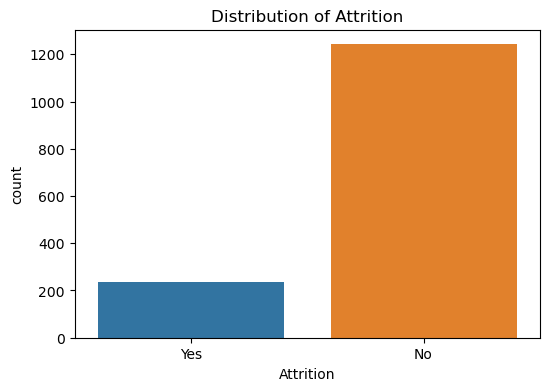

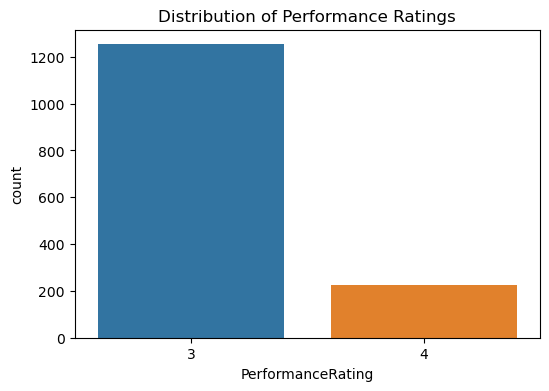

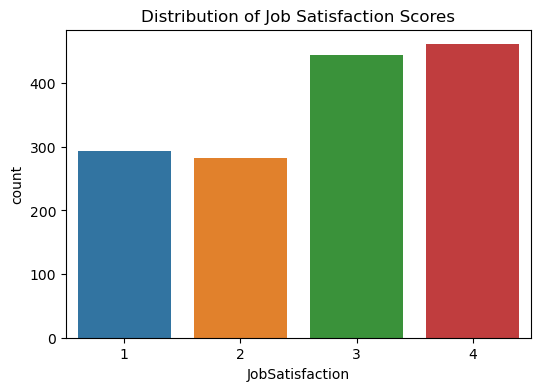

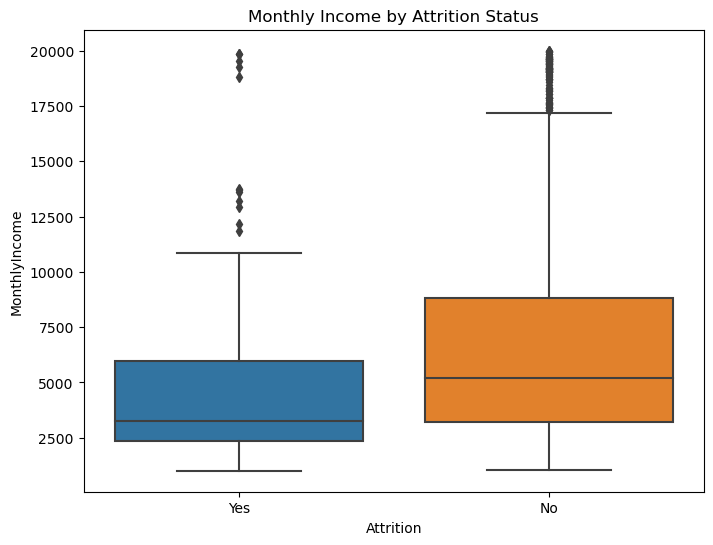

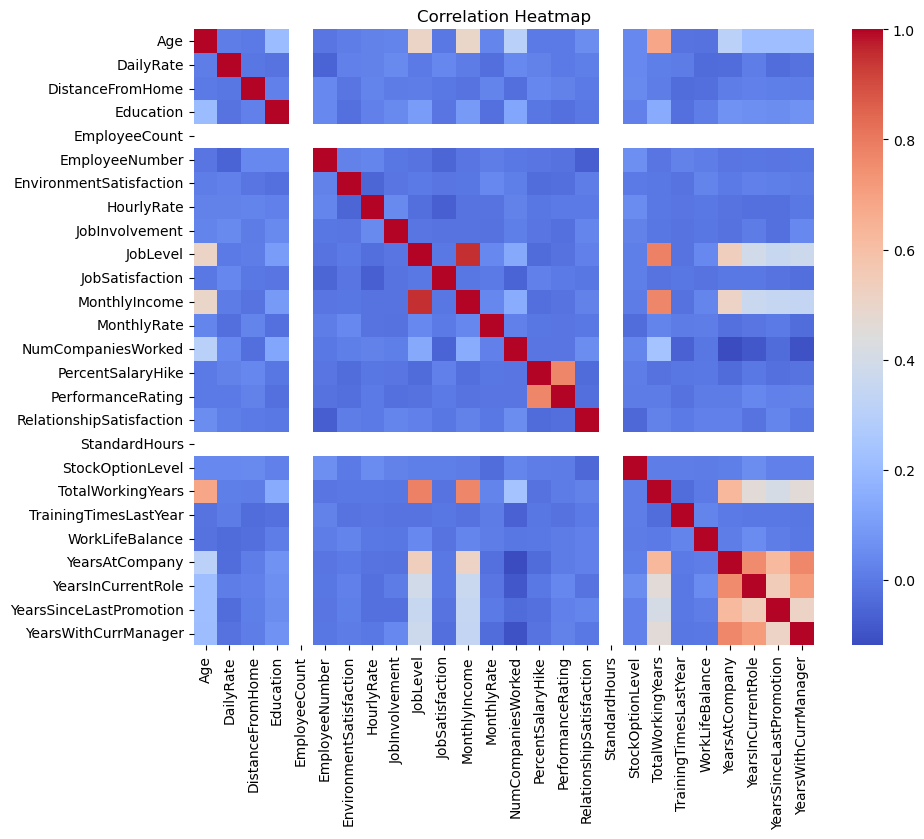

/opt/homebrew/anaconda3/envs/gdit_project/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


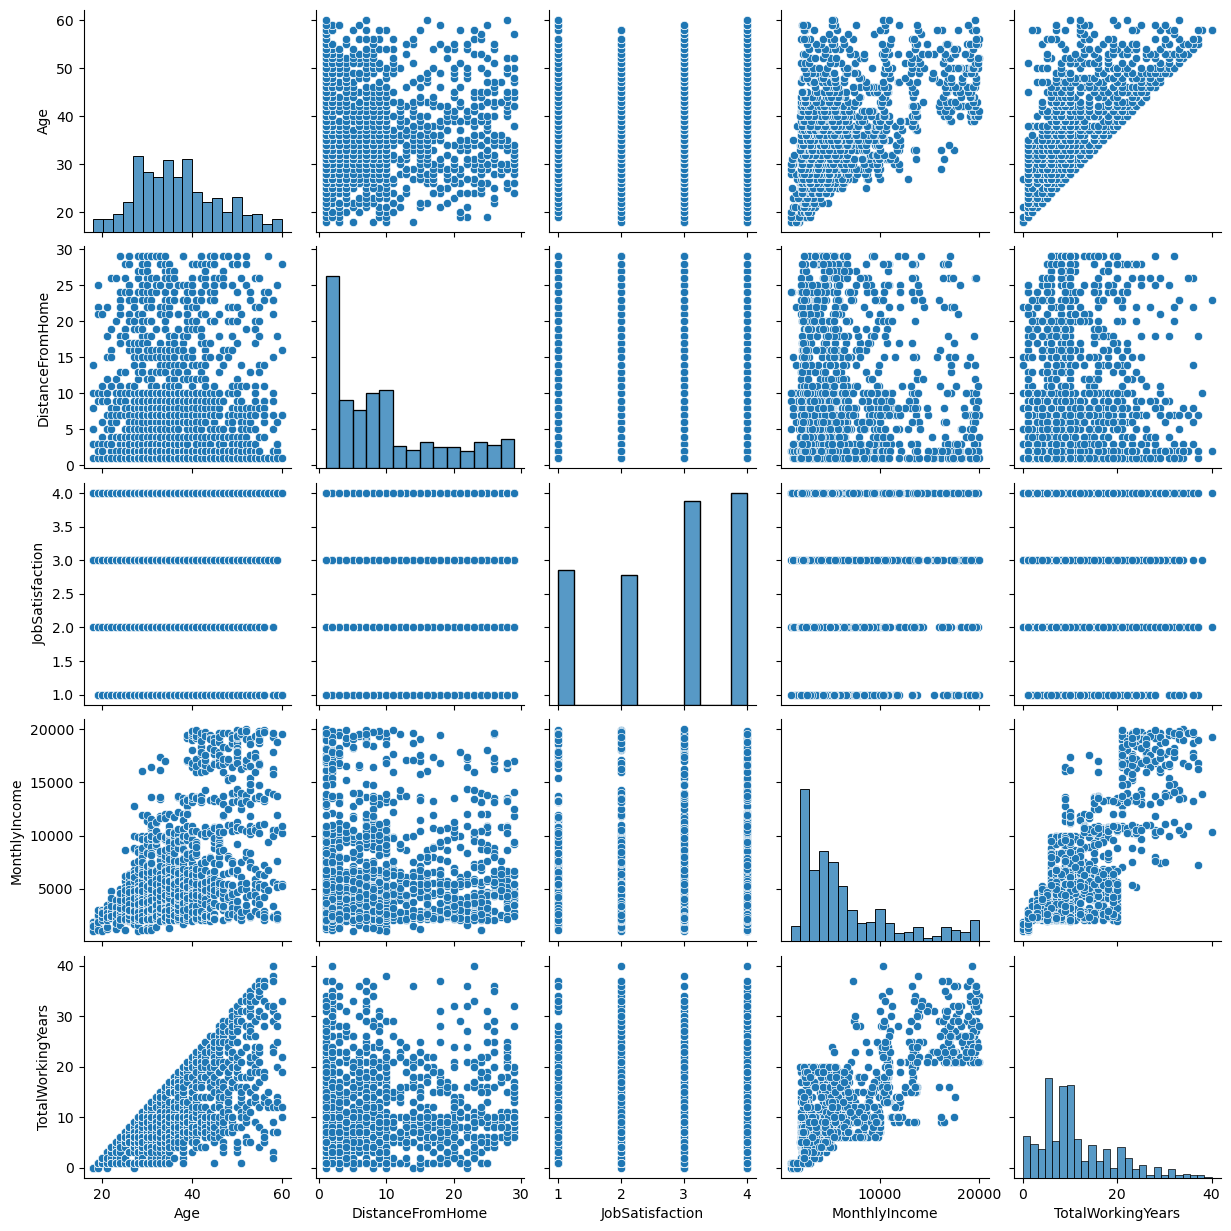

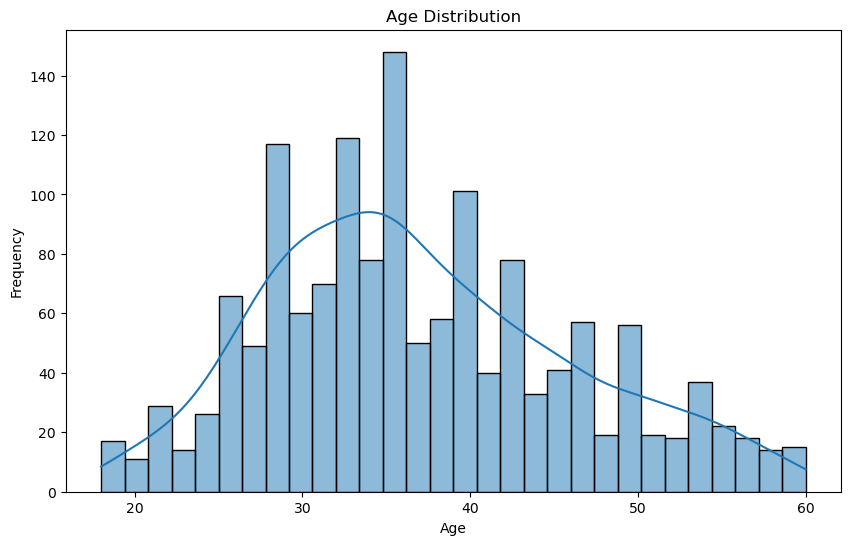

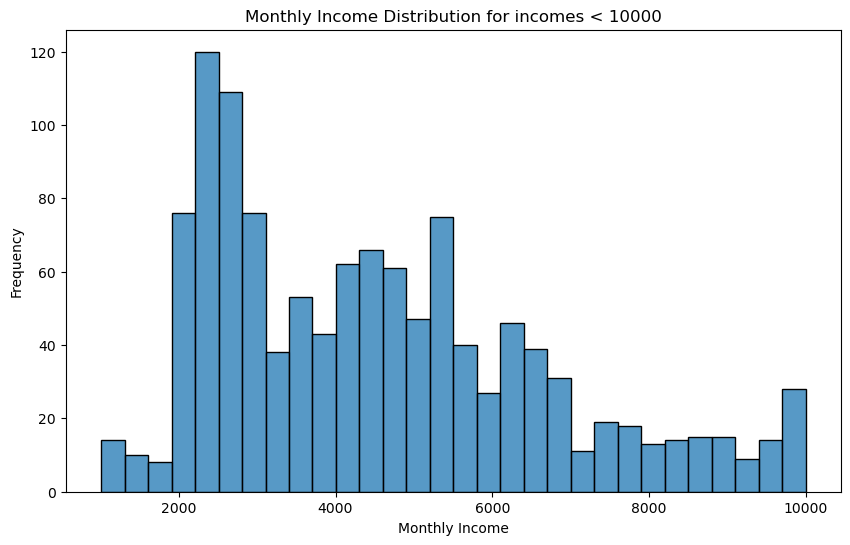

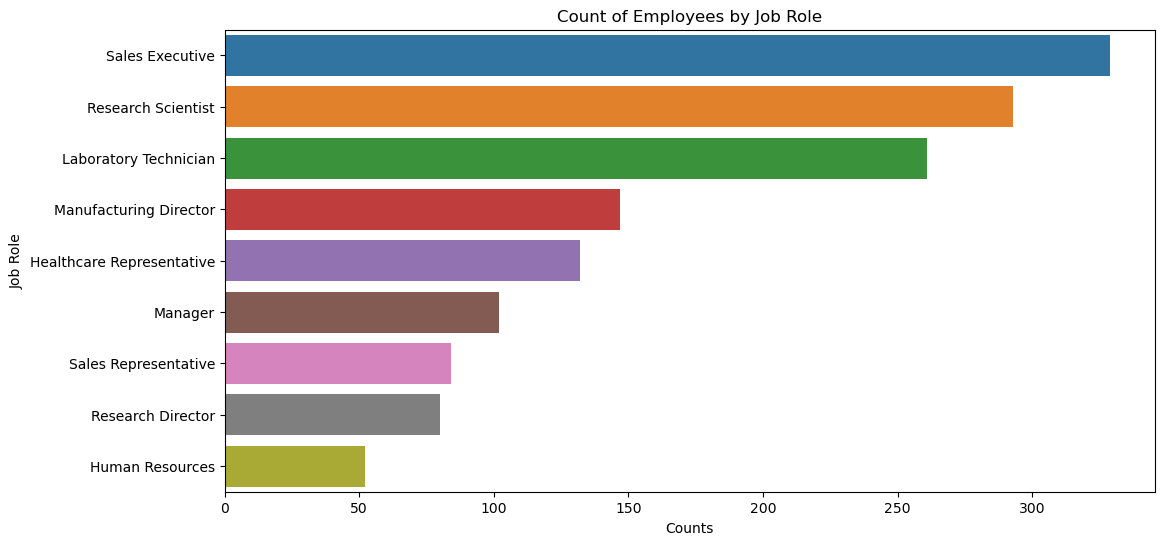

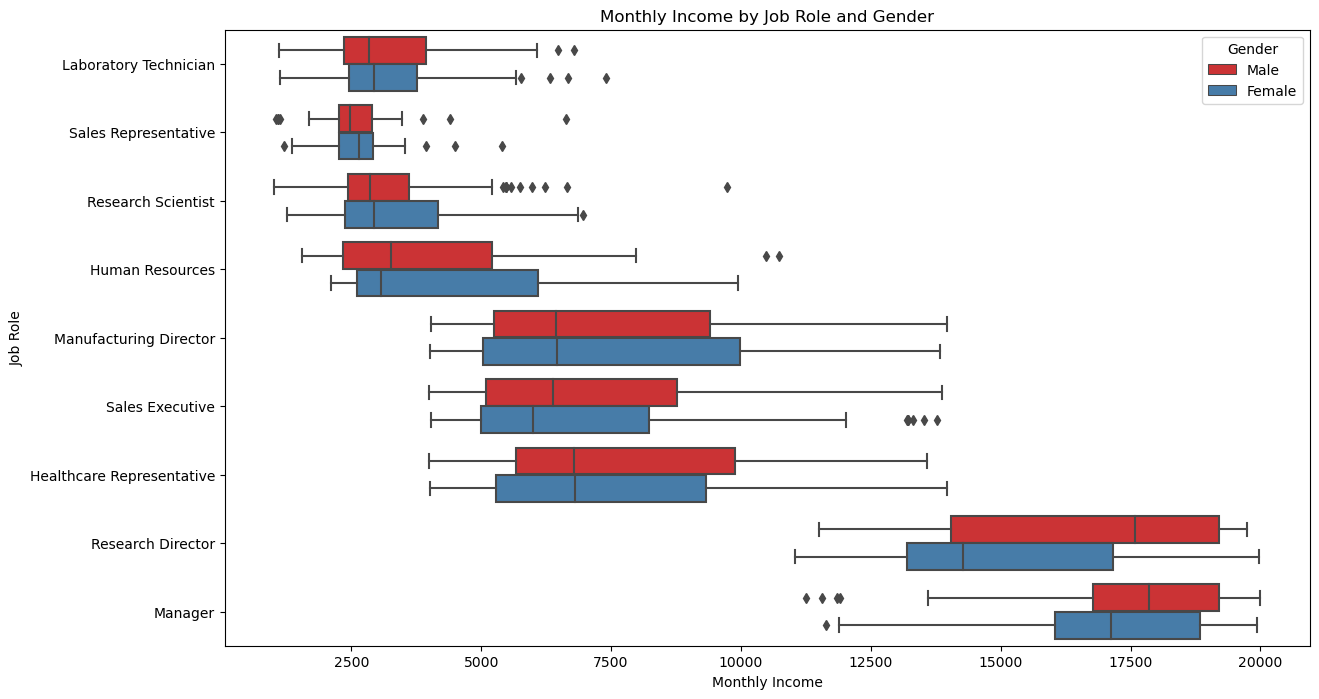

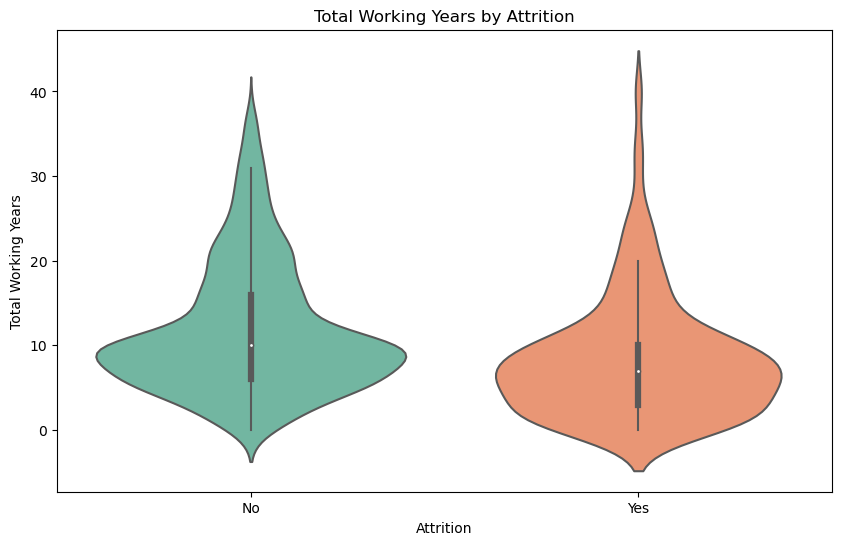

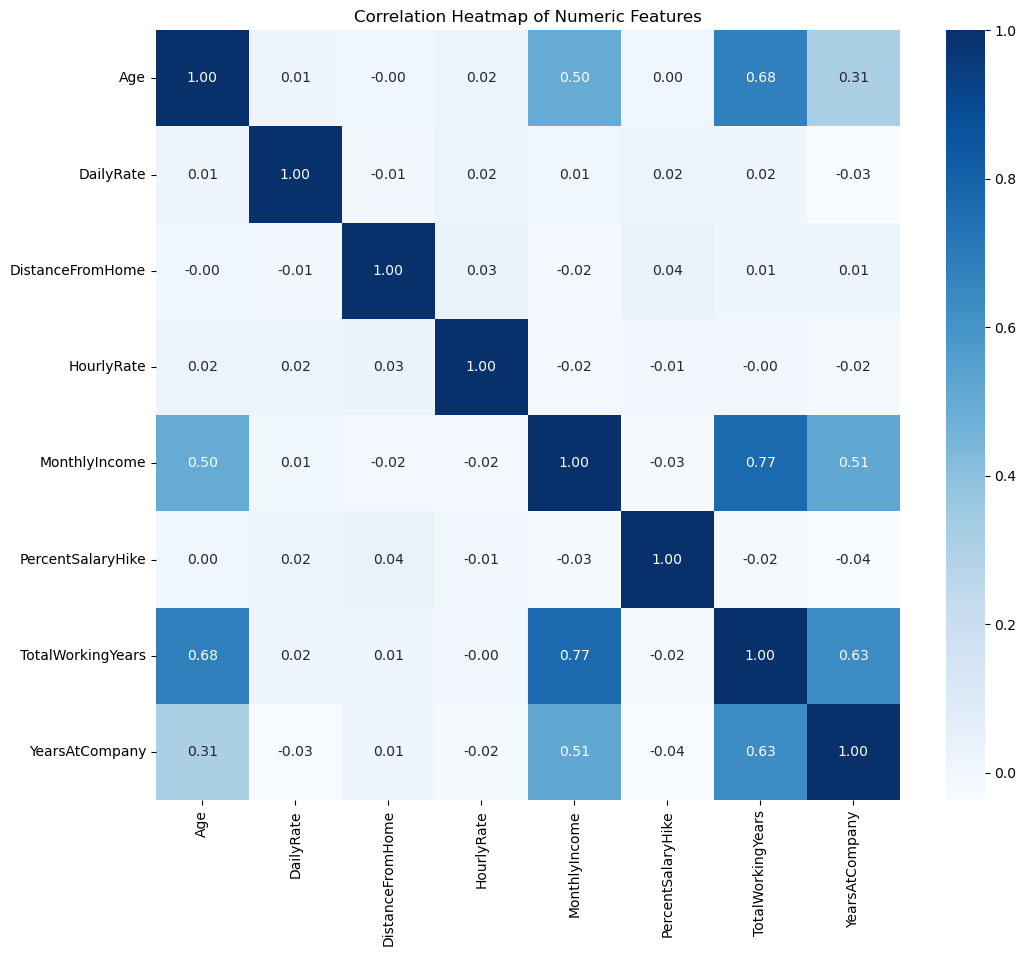

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming your dataframe is named 'hr_df'
# Replace 'hr_df' with the actual name of your dataframe

# Distribution of 'Attrition'
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=hr_df)
plt.title('Distribution of Attrition')
plt.show()

# Distribution of 'Performance Rating'
plt.figure(figsize=(6, 4))
sns.countplot(x='PerformanceRating', data=hr_df)
plt.title('Distribution of Performance Ratings')
plt.show()

# Distribution of 'Job Satisfaction'
plt.figure(figsize=(6, 4))
sns.countplot(x='JobSatisfaction', data=hr_df)
plt.title('Distribution of Job Satisfaction Scores')
plt.show()


# Boxplot of 'MonthlyIncome' by 'Attrition'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=hr_df)
plt.title('Monthly Income by Attrition Status')
plt.show()


hr_df_numeric = hr_df.select_dtypes(include=[np.number])


# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(hr_df_numeric.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
selected_features = ['Age', 'DistanceFromHome', 'JobSatisfaction', 'MonthlyIncome', 'TotalWorkingYears']
sns.pairplot(hr_df_numeric[selected_features])
plt.show()

hr_df['Attrition'] = hr_df['Attrition'].astype('category')

# Distribution of age with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(hr_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'MonthlyIncome' with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(hr_df[hr_df['MonthlyIncome'] < 10000]['MonthlyIncome'], bins=30, kde=False)
plt.title('Monthly Income Distribution for incomes < 10000')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

# Bar chart for 'JobRole' counts
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', data=hr_df, order = hr_df['JobRole'].value_counts().index)
plt.title('Count of Employees by Job Role')
plt.xlabel('Counts')
plt.ylabel('Job Role')
plt.show()

# Boxplot for 'MonthlyIncome' by 'JobRole' and 'Gender'
plt.figure(figsize=(14, 8))
sns.boxplot(x='MonthlyIncome', y='JobRole', hue='Gender', data=hr_df, palette="Set1")
plt.title('Monthly Income by Job Role and Gender')
plt.xlabel('Monthly Income')
plt.ylabel('Job Role')
plt.show()

# Violin plot for 'TotalWorkingYears' by 'Attrition'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition', y='TotalWorkingYears', data=hr_df, palette="Set2")
plt.title('Total Working Years by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

# Correlation heatmap for numeric features only
plt.figure(figsize=(12, 10))
numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany']
sns.heatmap(hr_df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Section 2: Predicting Attrition w/ Logistic Regression

### Objective of the Attrition Prediction Model

The goal of this logistic regression analysis was to identify key factors that significantly predict employee attrition. Understanding these can help an organization develop targeted strategies for improving employee retention. Attrition not only impacts team dynamics but also incurs significant costs due to the recruitment and training of new personnel. Therefore, by accurately predicting which employees are more likely to leave, proactive measures can be taken to prevent turnover, ultimately saving resources and maintaining organizational knowledge and morale.

### Initial Model
I started by building a logistic regression model to predict employee attrition based on several factors, including age, job satisfaction, and work-life balance. However, the initial model showed a significant imbalance in prediction capability - it performed well on the majority class (non-attrition) but poorly on the minority class (attrition), as evidenced by a low recall and F1 score for the attrition class.

### Next Step: Adjusting for Imbalance
To address the class imbalance, I applied the `class_weight='balanced'` parameter in the logistic regression model. This helped to adjust the importance of the minority class during the training process.

### Results after Balancing
The balanced model showed a marked improvement in the recall for the attrition class, indicating better identification of true attrition cases, albeit with a decrease in precision. The F1 score for the attrition class also improved, suggesting a more balanced performance between precision and recall.

### Insights from Coefficients
The coefficients from the logistic regression provided insights into the factors that contribute to attrition:
- Working overtime (`OverTime_Yes`) and being single (`MaritalStatus_Single`) had a strong positive association with attrition.
- As expected, higher job satisfaction was associated with a lower likelihood of attrition.

### Real-World Application and Value
The model's insights can guide HR interventions, such as addressing work-life balance and overtime policies, and tailoring retention strategies for high-risk groups. The improved model, while not perfect, gives a more nuanced understanding of the factors influencing employee turnover, which can be valuable for making data-driven decisions in human resource management.

### Conclusion
The logistic regression model, after adjusting for class imbalance, provides a useful predictive tool for identifying employees at risk of leaving. With these insights, organizations can proactively address issues that contribute to attrition and improve overall employee retention.

In [5]:
# Selecting features for the logistic regression model
features = ['Age', 'Department', 'JobSatisfaction', 'WorkLifeBalance', 'MonthlyIncome', 'JobRole', 'MaritalStatus', 'OverTime', 'TotalWorkingYears']
X = hr_df[features]

# One-hot encoding for categorical variables
categorical_features = ['Department', 'JobRole', 'MaritalStatus', 'OverTime']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Convert 'Attrition' to binary
y = hr_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Create and train the logistic regression model
# Create a logistic regression model with class weights
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Output the coefficients of the model
feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       374
           1       0.63      0.17      0.27        70

    accuracy                           0.85       444
   macro avg       0.75      0.58      0.59       444
weighted avg       0.83      0.85      0.82       444

[[367   7]
 [ 58  12]]
                                   Coefficient
OverTime_Yes                          1.663631
MaritalStatus_Single                  0.947290
JobRole_Laboratory Technician         0.610323
JobRole_Sales Representative          0.512374
Department_Sales                      0.282977
JobRole_Human Resources               0.147477
MaritalStatus_Married                 0.020979
MonthlyIncome                        -0.000053
Age                                  -0.013898
TotalWorkingYears                    -0.034039
JobRole_Research Director            -0.082004
JobRole_Manager                      -0.110427
JobRole_Sales Executive              -0

In [6]:
# Selecting features for the logistic regression model
features = ['Age', 'Department', 'JobSatisfaction', 'WorkLifeBalance', 'MonthlyIncome', 'JobRole', 'MaritalStatus', 'OverTime', 'TotalWorkingYears']
X = hr_df[features]

# One-hot encoding for categorical variables
categorical_features = ['Department', 'JobRole', 'MaritalStatus', 'OverTime']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Convert 'Attrition' to binary
y = hr_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Create and train the logistic regression model
# Create a logistic regression model (with class weights)
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Output the coefficients of the model
feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       374
           1       0.35      0.64      0.45        70

    accuracy                           0.75       444
   macro avg       0.63      0.71      0.65       444
weighted avg       0.83      0.75      0.78       444

[[289  85]
 [ 25  45]]
                                   Coefficient
OverTime_Yes                          1.650872
MaritalStatus_Single                  1.009497
JobRole_Laboratory Technician         0.688787
JobRole_Sales Representative          0.557377
Department_Sales                      0.319869
MaritalStatus_Married                 0.257643
JobRole_Human Resources               0.232036
MonthlyIncome                        -0.000045
Age                                  -0.004796
Department_Research & Development    -0.009123
TotalWorkingYears                    -0.022860
JobRole_Sales Executive              -0.051020
JobRole_Manufacturing Director       -0

## Section 3: What Influences Job Satisfaction and High Performance? Is it Salary?

### Overview
The initial objective of my analysis was to understand what factors contribute to employee satisfaction and what could potentially boost performance ratings. I hypothesized that salary would significantly impact both satisfaction and performance.

### Initial Correlation and Scatter Plots
The exploration started with correlation and scatter plots to examine the relationship between salary and Job Satisfaction/Performance Ratings. Contrary to my initial hypothesis, these indicated a weak correlation, suggesting salary might not be the key determinant.

### Modeling Attempts
I built and evaluated several predictive models, including logistic regression, random forest, and gradient boosting classifiers. These models primarily predicted the majority class, leading to inflated accuracy but poor performance on minority classes.

### Addressing Imbalance
I attempted to address the class imbalance by adjusting class weights and changing performance metrics. However, the models' predictive performance for Job Satisfaction and Performance Ratings remained limited.

### Visualization with Boxplots and Violin Plots
Due to predictive modeling limitations, I shifted focus to descriptive analysis using boxplots and violin plots, providing a qualitative perspective on the dataset's patterns.

### Conclusion
My analysis indicates that employee satisfaction and performance ratings are complex, influenced by various factors beyond salary. The diversity in individual goals and aspirations makes it a significant challenge to predict these outcomes accurately. While more data and advanced modeling may enhance accuracy, understanding the full scope of employee satisfaction and performance is an intricate endeavor.


Correlation between Monthly Income and Performance Rating: -0.017
Correlation between Monthly Income and Job Satisfaction: -0.009


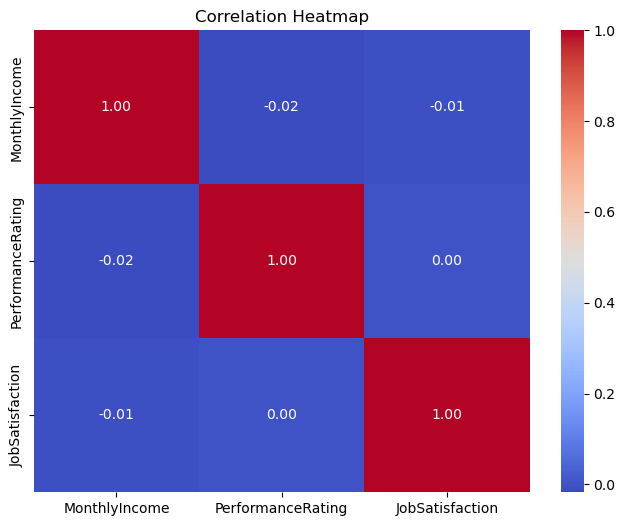

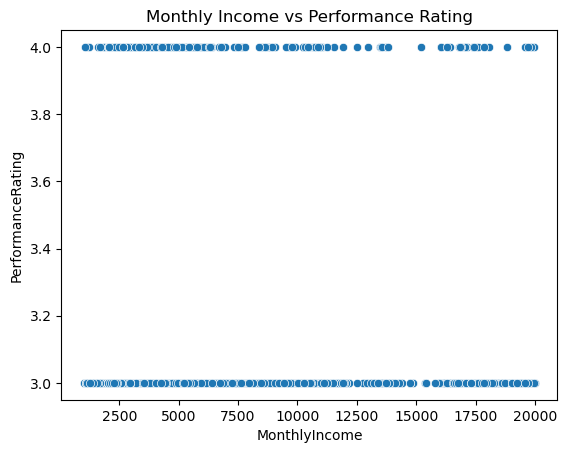

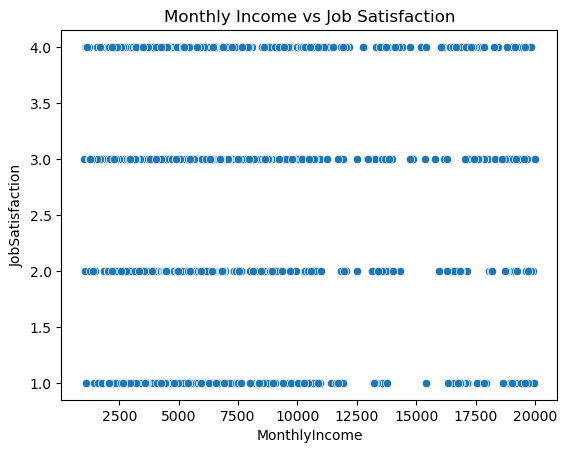

In [7]:
# Categorizing the 'MonthlyIncome' feature into salary bands.
salary_bins = [0, 3000, 6000, 9000, 12000, 15000, 18000, 21000]
salary_labels = ['0-3k', '3k-6k', '6k-9k', '9k-12k', '12k-15k', '15k-18k', '18k+']
hr_df['SalaryBand'] = pd.cut(hr_df['MonthlyIncome'], bins=salary_bins, labels=salary_labels)

# Now, let's calculate the correlation coefficients
performance_corr, _ = pearsonr(hr_df['MonthlyIncome'], hr_df['PerformanceRating'])
satisfaction_corr, _ = pearsonr(hr_df['MonthlyIncome'], hr_df['JobSatisfaction'])

print(f'Correlation between Monthly Income and Performance Rating: {performance_corr:.3f}')
print(f'Correlation between Monthly Income and Job Satisfaction: {satisfaction_corr:.3f}')

# For visualization, let's create a heatmap to show the correlation matrix
correlation_matrix = hr_df[['MonthlyIncome', 'PerformanceRating', 'JobSatisfaction']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot to show the relationship between salary and performance rating
sns.scatterplot(data=hr_df, x='MonthlyIncome', y='PerformanceRating')
plt.title('Monthly Income vs Performance Rating')
plt.show()

# Scatter plot to show the relationship between salary and job satisfaction
sns.scatterplot(data=hr_df, x='MonthlyIncome', y='JobSatisfaction')
plt.title('Monthly Income vs Job Satisfaction')
plt.show()

Unforunately, the plots above don't tell us much at all. Let's make new ones that are a bit more descriptive.

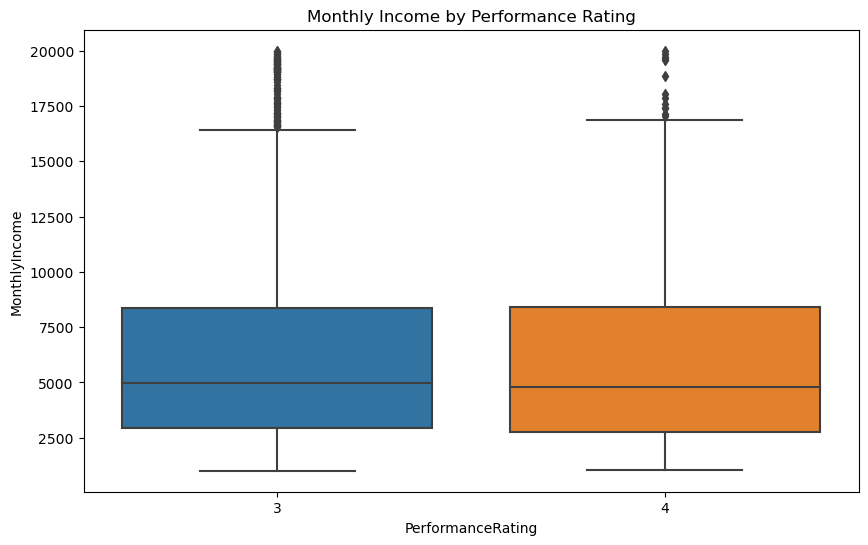

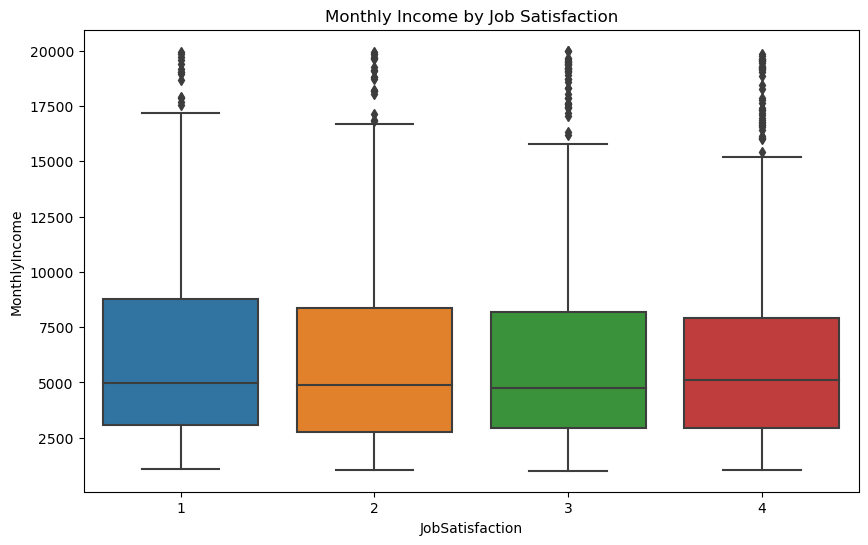

In [8]:
# Box plot for Monthly Income vs Performance Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='MonthlyIncome', data=hr_df)
plt.title('Monthly Income by Performance Rating')
plt.show()

# Box plot for Monthly Income vs Job Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=hr_df)
plt.title('Monthly Income by Job Satisfaction')
plt.show()

Surprisingly, salary does not have much of an impact on performance or satisfaction. Let's build models using the other dataset features instead.

### Predicting Job Satisfaction with Random Forest
The model's accuracy is relatively low (approximately 31%), which indicates that it may not be effectively predicting job satisfaction levels. The F1-scores across different satisfaction levels also suggest that the model is struggling to make precise and consistent predictions.

However, the feature importance scores can still offer insights. For instance, HourlyRate, MonthlyIncome, and DistanceFromHome are some of the top features, suggesting they have more influence on job satisfaction levels according to the model's understanding. Yet, the low predictive performance implies that the model, as currently configured, may not be very useful for making reliable predictions in a real-world setting.

In [9]:
#Removing null values from the dataset and dropping unnecesary columns
hr_df_rf = hr_df.dropna()
hr_df_rf = hr_df_rf.drop(['EmpID', 'EmployeeNumber'], axis=1)

# Encode categorical variables
label_encoders = {}
for column in hr_df_rf.select_dtypes(exclude=[np.number]).columns:
    label_encoders[column] = LabelEncoder()
    hr_df_rf[column] = label_encoders[column].fit_transform(hr_df_rf[column])

# Defining features and target variable
X = hr_df_rf.drop(['JobSatisfaction', 'PerformanceRating'], axis=1)
y = hr_df_rf['JobSatisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns
importance_dict = dict(zip(features, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_importance:
    print(f'{feature}: {importance}')

              precision    recall  f1-score   support

           1       0.27      0.10      0.14        83
           2       0.40      0.07      0.12        88
           3       0.28      0.39      0.33       128
           4       0.26      0.41      0.32       128

    accuracy                           0.27       427
   macro avg       0.30      0.24      0.23       427
weighted avg       0.30      0.27      0.25       427

Accuracy: 0.27400468384074944
DailyRate: 0.0707125280157935
HourlyRate: 0.06290255461034765
MonthlyRate: 0.06144937014467211
MonthlyIncome: 0.05968949857436301
DistanceFromHome: 0.051209906941301064
Age: 0.05056648844050962
PercentSalaryHike: 0.04694001837947006
TotalWorkingYears: 0.043712358415827476
YearsAtCompany: 0.037782021401806996
NumCompaniesWorked: 0.03563512954037897
YearsInCurrentRole: 0.03449760027691954
YearsWithCurrManager: 0.03360998440330136
YearsSinceLastPromotion: 0.03199386279421327
TrainingTimesLastYear: 0.030803613094028806
EducationField

### Predicting Job Satisfaction with Gradient Boosting
Since Random Forest proved to be a bit lackluster, I wanted to try a more robust modeling method like Gradient Boosting. However, the results from the Gradient Boosting model indicated a low performance across all classes for predicting job satisfaction levels, with an overall accuracy of around 29%. This suggests the model may not have captured the underlying patterns effectively.

The feature importances provided by the model suggest that MonthlyRate, MonthlyIncome, and DailyRate are the top three features. However, given the low predictive performance, it's difficult to draw reliable conclusions from this model about what affects job satisfaction.

It may be beneficial to revisit the feature selection process, consider additional feature engineering, or explore other modeling techniques that might capture the complexity of job satisfaction better. It's also possible that job satisfaction is influenced by factors not captured in the dataset.

In [10]:
hr_df_rf = hr_df.dropna()
hr_df_rf = hr_df_rf.drop(['EmpID', 'EmployeeNumber'], axis=1)

label_encoders = {}
for column in hr_df_rf.select_dtypes(exclude=[np.number]).columns:
    label_encoders[column] = LabelEncoder()
    hr_df_rf[column] = label_encoders[column].fit_transform(hr_df_rf[column])

# Defining features and target variable
X = hr_df_rf.drop(['JobSatisfaction', 'PerformanceRating'], axis=1) 
y = hr_df_rf['JobSatisfaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Feature importances
feature_importances = gb_clf.feature_importances_
features = X_train.columns
feature_importance_dict = dict(zip(features, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f'{feature}: {importance}')

              precision    recall  f1-score   support

           1       0.23      0.14      0.18        83
           2       0.18      0.10      0.13        88
           3       0.29      0.34      0.31       128
           4       0.30      0.42      0.35       128

    accuracy                           0.28       427
   macro avg       0.25      0.25      0.24       427
weighted avg       0.26      0.28      0.26       427

Accuracy: 0.27634660421545665
Feature Importances:
MonthlyRate: 0.12539330838039597
DailyRate: 0.10249946650914352
MonthlyIncome: 0.10132787675422962
HourlyRate: 0.07077925745082747
DistanceFromHome: 0.06138046946209513
TotalWorkingYears: 0.047509965513892354
YearsAtCompany: 0.047398019256633894
Age: 0.04733120495963559
YearsInCurrentRole: 0.03822031795478539
PercentSalaryHike: 0.03597926882530401
TrainingTimesLastYear: 0.030493373462163263
YearsSinceLastPromotion: 0.025646352968030445
Education: 0.024846557804374197
JobInvolvement: 0.0244415105482281
JobRole

### Predicting Performance Ratings with Random Forest (No Balancing)
Initially, I used a Random Forest model without any class balancing to predict Performance Ratings. Despite its robustness, the model predominantly predicted the majority class, leading to high overall accuracy but poor representation of the minority class. This outcome highlighted the challenges posed by the imbalanced nature of our dataset.

In [11]:
#Removing null values from the dataset and dropping unnecesary columns
hr_df_rf = hr_df.dropna()
hr_df_rf = hr_df_rf.drop(['EmpID', 'EmployeeNumber', 'PercentSalaryHike', 'MonthlyRate', 'MonthlyIncome', 'DailyRate', 'HourlyRate'], axis=1)

# Encode categorical variables
label_encoders = {}
for column in hr_df_rf.select_dtypes(exclude=[np.number]).columns:
    label_encoders[column] = LabelEncoder()
    hr_df_rf[column] = label_encoders[column].fit_transform(hr_df_rf[column])

# Defining features and target variable
X = hr_df_rf.drop(['JobSatisfaction', 'PerformanceRating'], axis=1)
y = hr_df_rf['PerformanceRating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns
importance_dict = dict(zip(features, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_importance:
    print(f'{feature}: {importance}')

              precision    recall  f1-score   support

           3       0.84      1.00      0.91       359
           4       0.00      0.00      0.00        68

    accuracy                           0.84       427
   macro avg       0.42      0.50      0.46       427
weighted avg       0.71      0.84      0.77       427

Accuracy: 0.8407494145199064
Age: 0.07755971860237235
DistanceFromHome: 0.07184349190756513
TotalWorkingYears: 0.06709434389120646
YearsInCurrentRole: 0.05188567337144538
YearsAtCompany: 0.051383131828091476
NumCompaniesWorked: 0.04763310752019454
JobRole: 0.045849551570144795
TrainingTimesLastYear: 0.04523162048971739
YearsSinceLastPromotion: 0.04354845830394803
YearsWithCurrManager: 0.04336605750958749
Education: 0.039479907847984996
EducationField: 0.03633186110993268
EnvironmentSatisfaction: 0.036312983756101834
WorkLifeBalance: 0.03507743999263016
RelationshipSatisfaction: 0.03469051066468535
JobInvolvement: 0.031261756253608254
SalaryBand: 0.03027304165431498

/opt/homebrew/anaconda3/envs/gdit_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/gdit_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/gdit_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### For Context: Dataset Imbalance
As you can see below, most of the employees in the dataset (about 84% to be exact) scored a '3' during their performance appraisals. Essentially, our model is predicting that every employee will receive a score of 3, and it is consequently correct 84% of the time. However, such a model would not be genuinely predictive or insightful. It would be akin to making a guess based on the majority class, rather than discerning the true performance drivers. Recognizing this imbalance is crucial for understanding the subsequent modeling efforts and their limitations.

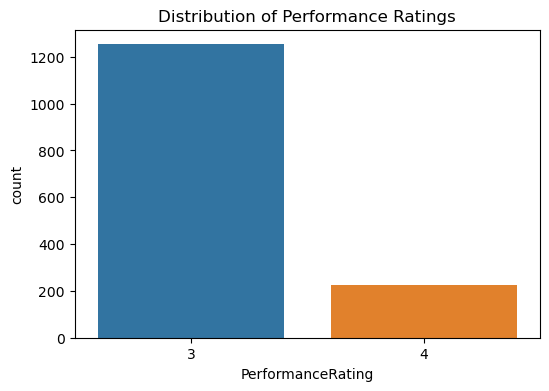

In [12]:
# Distribution of 'Performance Ratings'
plt.figure(figsize=(6, 4))
sns.countplot(x='PerformanceRating', data=hr_df)
plt.title('Distribution of Performance Ratings')
plt.show()

### Random Forest with Class Weight Balancing
To address the imbalance, I adjusted the Random Forest model to include class weights, aiming for a more balanced prediction. However, this approach did not significantly improve the model's ability to predict the minority class effectively, as indicated by low F1 scores for the minority class.

In [13]:
#Removing null values from the dataset and dropping unnecesary columns
hr_df_rf = hr_df.dropna()
hr_df_rf = hr_df_rf.drop(['EmpID', 'EmployeeNumber', 'PercentSalaryHike', 'MonthlyRate', 'MonthlyIncome', 'DailyRate', 'HourlyRate'], axis=1)

# Encode categorical variables
label_encoders = {}
for column in hr_df_rf.select_dtypes(exclude=[np.number]).columns:
    label_encoders[column] = LabelEncoder()
    hr_df_rf[column] = label_encoders[column].fit_transform(hr_df_rf[column])

# Defining features and target variable
X = hr_df_rf.drop(['JobSatisfaction', 'PerformanceRating'], axis=1)
y = hr_df_rf['PerformanceRating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=7)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns
importance_dict = dict(zip(features, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_importance:
    print(f'{feature}: {importance}')

              precision    recall  f1-score   support

           3       0.84      1.00      0.91       359
           4       0.00      0.00      0.00        68

    accuracy                           0.84       427
   macro avg       0.42      0.50      0.46       427
weighted avg       0.71      0.84      0.77       427

Accuracy: 0.8407494145199064
Age: 0.08002217075910364
DistanceFromHome: 0.07505898383037743
TotalWorkingYears: 0.06514797609771264
YearsAtCompany: 0.05601234469668089
NumCompaniesWorked: 0.04963201306243937
JobRole: 0.04814242962022772
YearsWithCurrManager: 0.0464313519232327
YearsSinceLastPromotion: 0.045850176288495775
YearsInCurrentRole: 0.04569336325748519
TrainingTimesLastYear: 0.042694619525854405
EducationField: 0.0399384075110172
Education: 0.03838672712180698
EnvironmentSatisfaction: 0.03615833533093311
RelationshipSatisfaction: 0.034479693968388674
SalaryBand: 0.03329776047887446
WorkLifeBalance: 0.03046977329727299
JobInvolvement: 0.02906652890450794
Sto

/opt/homebrew/anaconda3/envs/gdit_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/gdit_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/gdit_project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Random Forest Focusing on F1 Score and AUC/ROC
Finally, I shifted focus to evaluating the model based on F1 score and AUC/ROC metrics, which are more suitable for imbalanced datasets. The results revealed that while accuracy was still high due to the model's bias towards the majority class, the F1 score and AUC/ROC scores were also unsatisfactory, suggesting the model was not effectively distinguishing between performance rating classes. It seems like the imbalanced nature of the dataset is quite a problem. Additional data collection may prove to be valuable.

In [14]:
hr_df_rf = hr_df.dropna()
hr_df_rf = hr_df_rf.drop(['EmpID', 'EmployeeNumber', 'PercentSalaryHike', 'MonthlyRate', 'MonthlyIncome', 'DailyRate', 'HourlyRate'], axis=1)

# Encode categorical variables
label_encoders = {}
for column in hr_df_rf.select_dtypes(exclude=[np.number]).columns:
    label_encoders[column] = LabelEncoder()
    hr_df_rf[column] = label_encoders[column].fit_transform(hr_df_rf[column])

# Defining features and target variable
X = hr_df_rf.drop(['JobSatisfaction', 'PerformanceRating'], axis=1)
y = hr_df_rf['PerformanceRating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=7)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate F1 Score for the minority class (class '4')
f1 = f1_score(y_test, y_pred, labels=[4], average=None)
print(f'F1 Score for class 4: {f1}')

# Calculate the ROC-AUC score
# For ROC-AUC, you need prediction probabilities for the positive class (class '4')
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # assuming class '4' is the positive class and is at index 1
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc}')
print()

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns
importance_dict = dict(zip(features, importances))
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_importance:
    print(f'{feature}: {importance}')

F1 Score for class 4: [0.]
ROC-AUC Score: 0.4962518433557267

Age: 0.08002217075910364
DistanceFromHome: 0.07505898383037743
TotalWorkingYears: 0.06514797609771264
YearsAtCompany: 0.05601234469668089
NumCompaniesWorked: 0.04963201306243937
JobRole: 0.04814242962022772
YearsWithCurrManager: 0.0464313519232327
YearsSinceLastPromotion: 0.045850176288495775
YearsInCurrentRole: 0.04569336325748519
TrainingTimesLastYear: 0.042694619525854405
EducationField: 0.0399384075110172
Education: 0.03838672712180698
EnvironmentSatisfaction: 0.03615833533093311
RelationshipSatisfaction: 0.034479693968388674
SalaryBand: 0.03329776047887446
WorkLifeBalance: 0.03046977329727299
JobInvolvement: 0.02906652890450794
StockOptionLevel: 0.027976305644460808
MaritalStatus: 0.026022321747288784
JobLevel: 0.024866062707391556
AgeGroup: 0.02383575772872841
BusinessTravel: 0.020761344185319466
SalarySlab: 0.02032291262748811
Gender: 0.018970570870720353
Department: 0.016481407233139123
OverTime: 0.014115153870664181

### Visualizing Factors Influencing Job Satisfaction
Given the limitations of our models in accurately predicting Job Satisfaction, I turned to detailed visualizations to gain insights. Through boxplots and violin plots, we can explore how various factors such as age, income, department, and role might influence an employee's satisfaction levels. These visualizations revealed nuanced relationships and patterns that aren't immediately apparent in predictive modeling. For instance, they provided a qualitative understanding of how satisfaction varies across different roles and departments, highlighting areas where targeted interventions might improve overall job satisfaction.

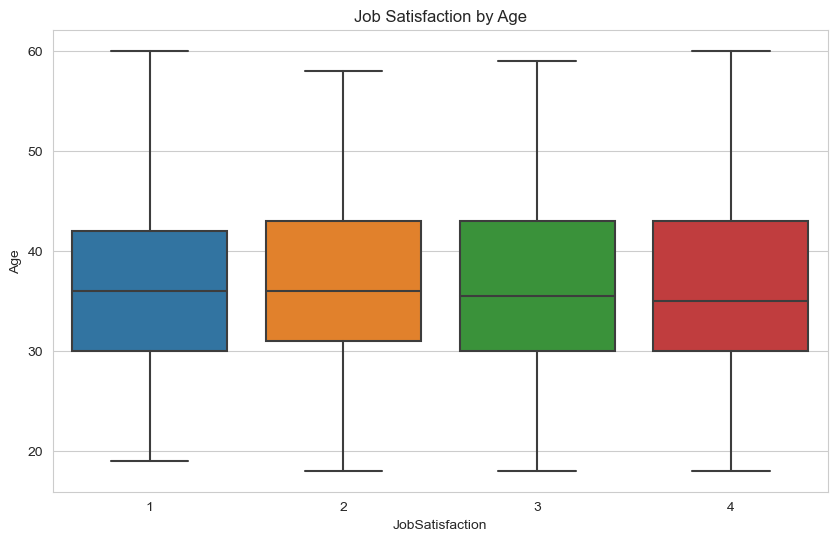

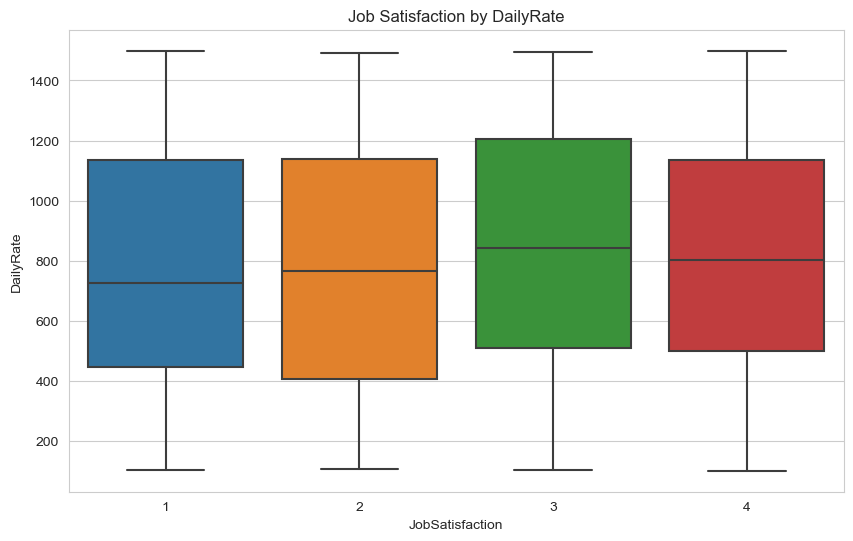

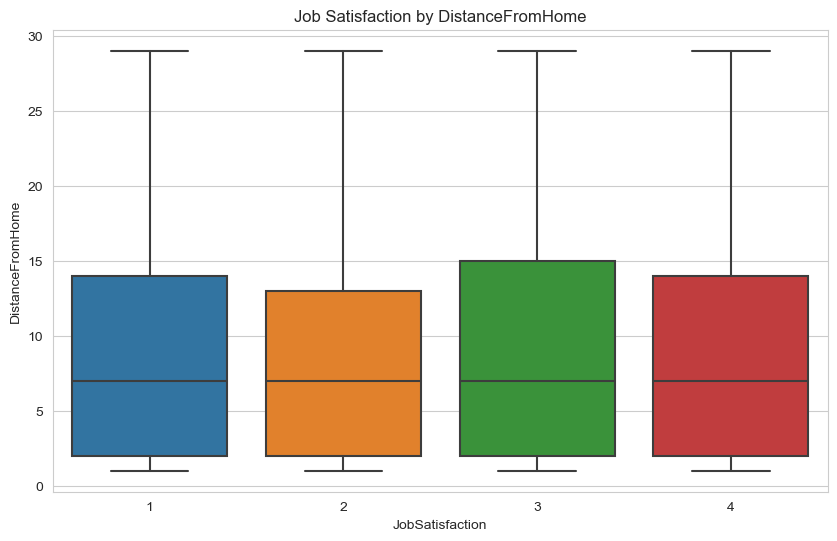

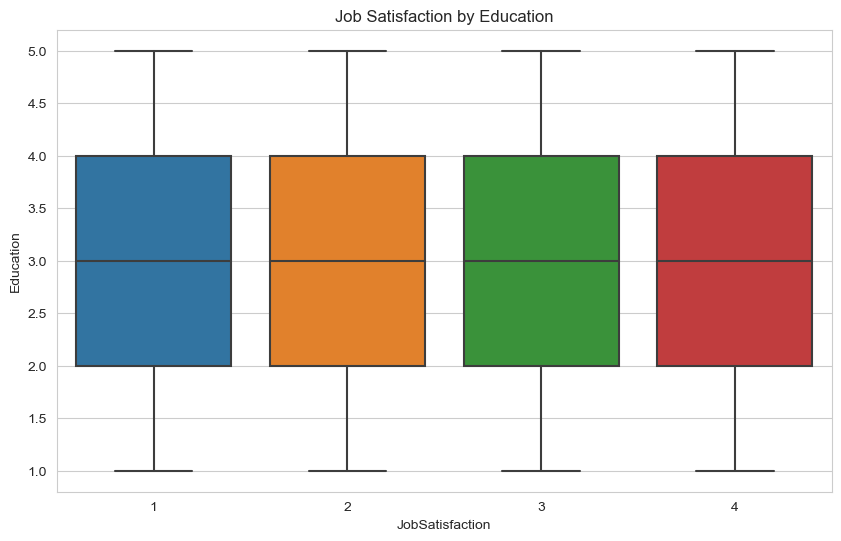

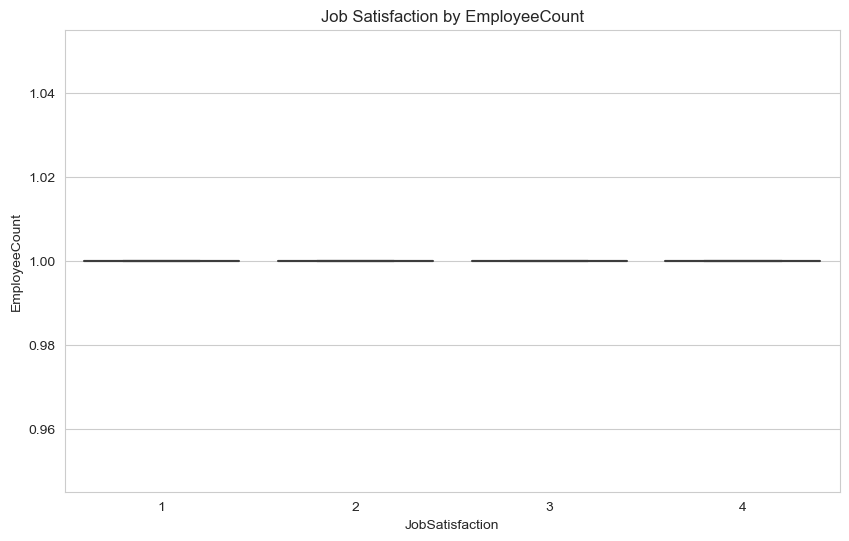

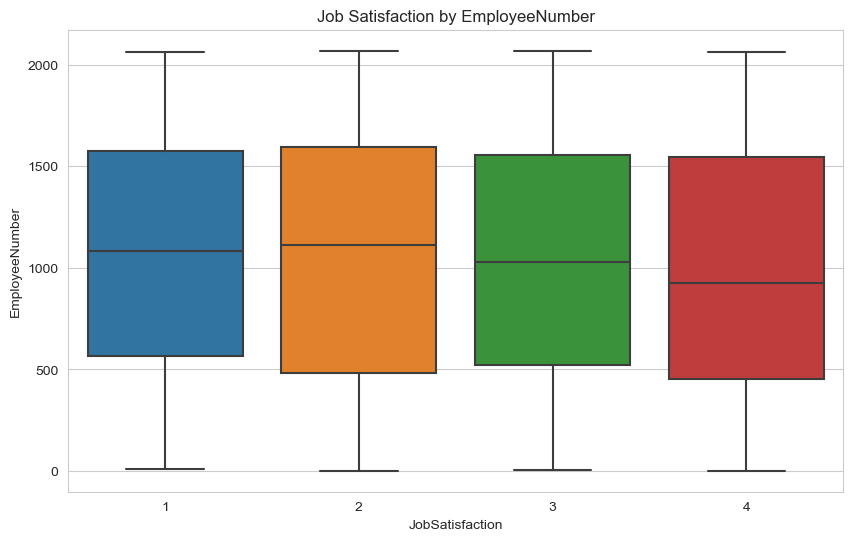

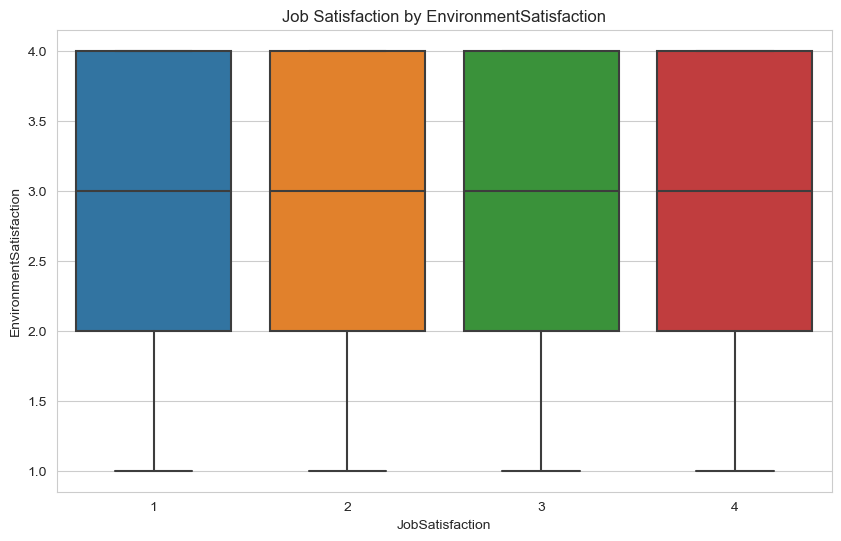

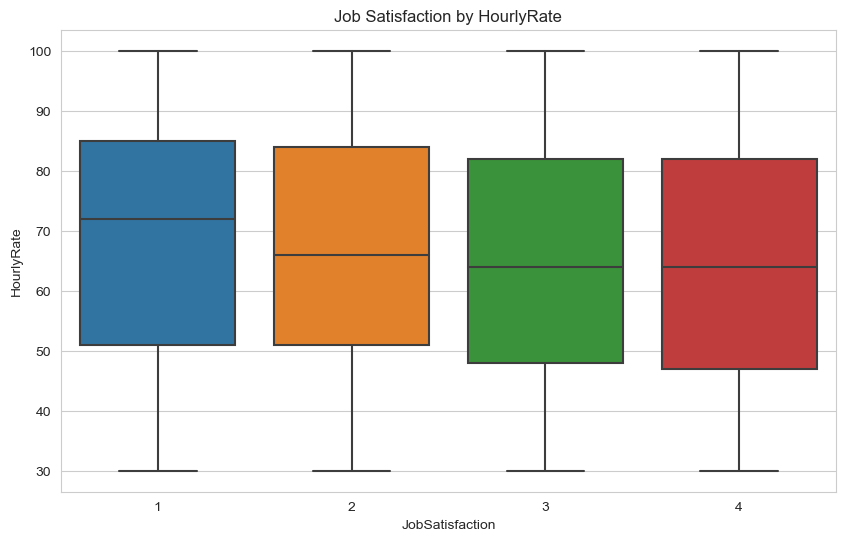

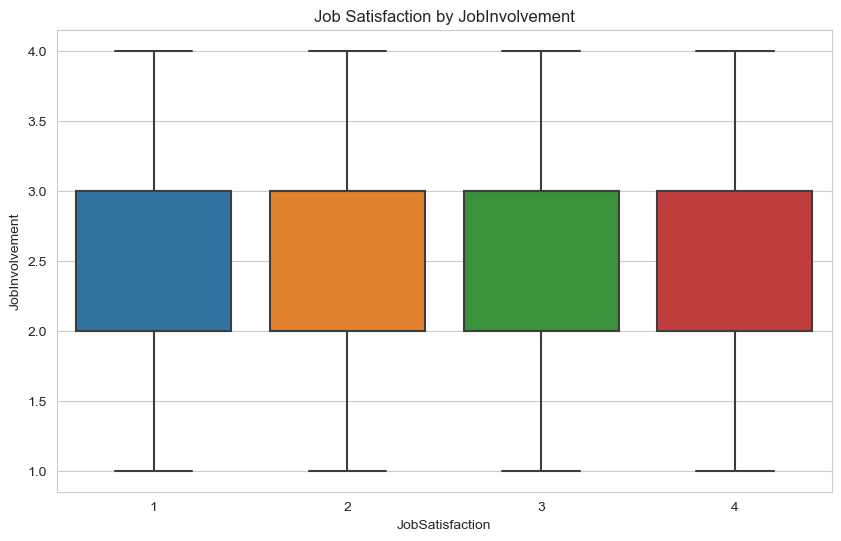

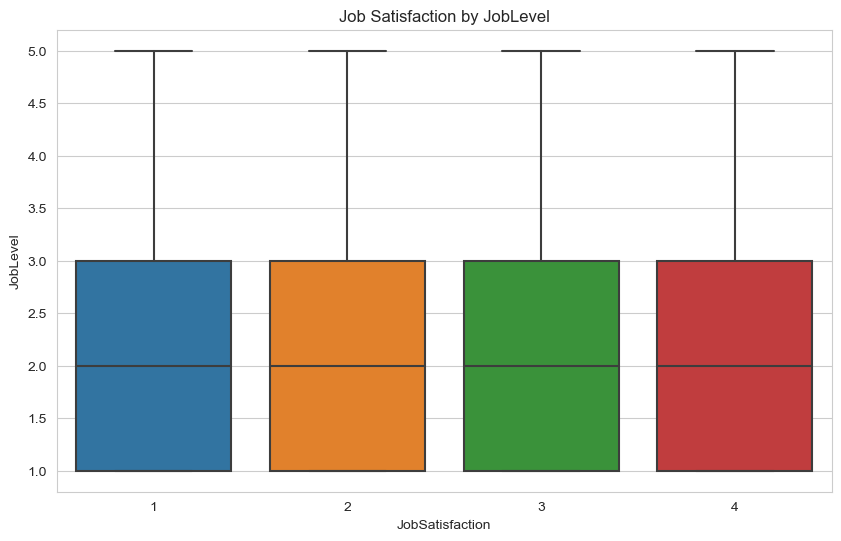

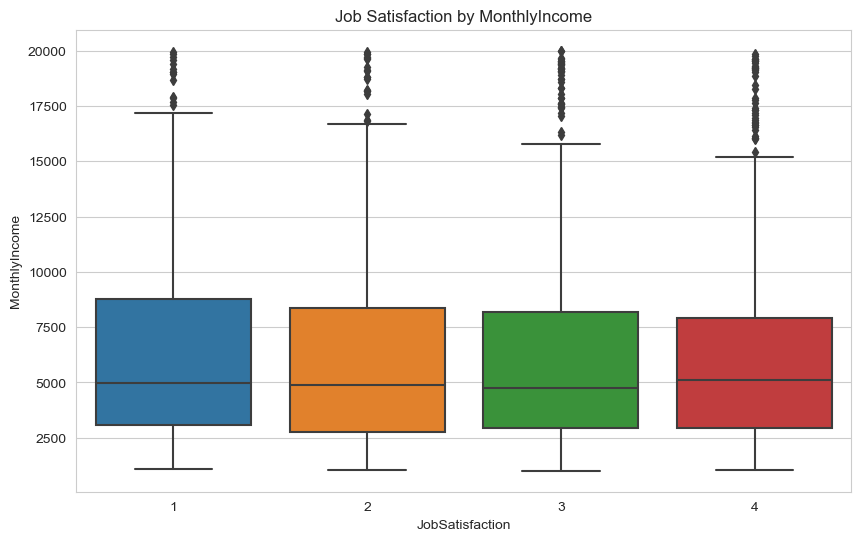

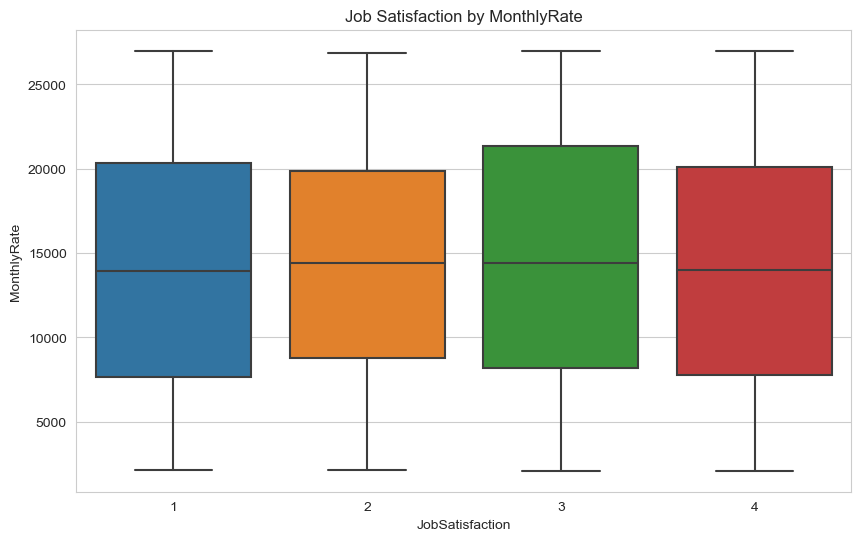

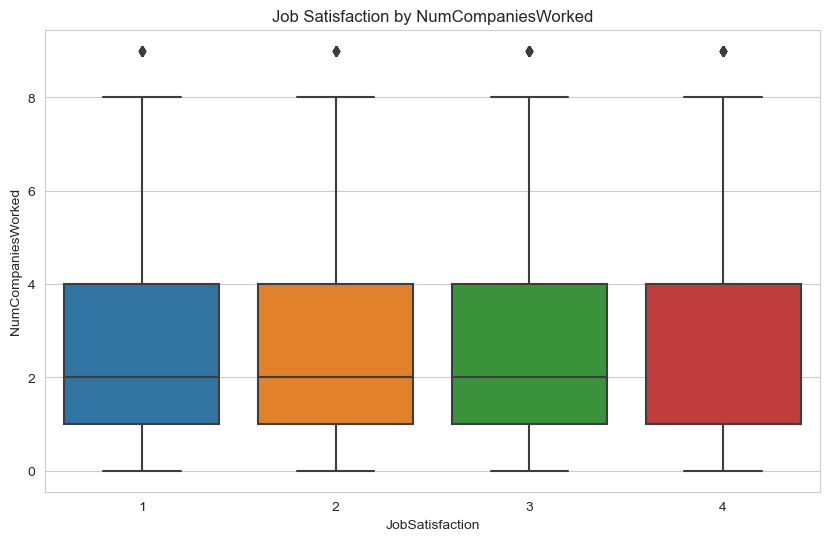

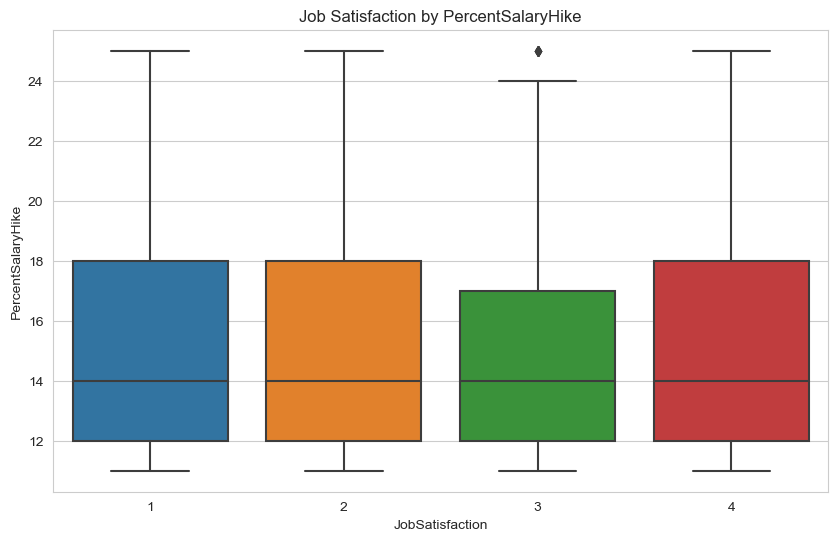

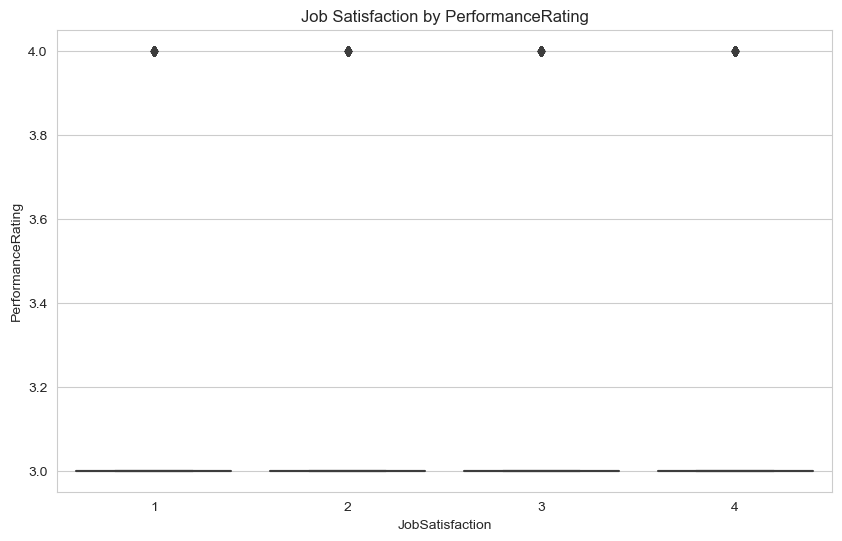

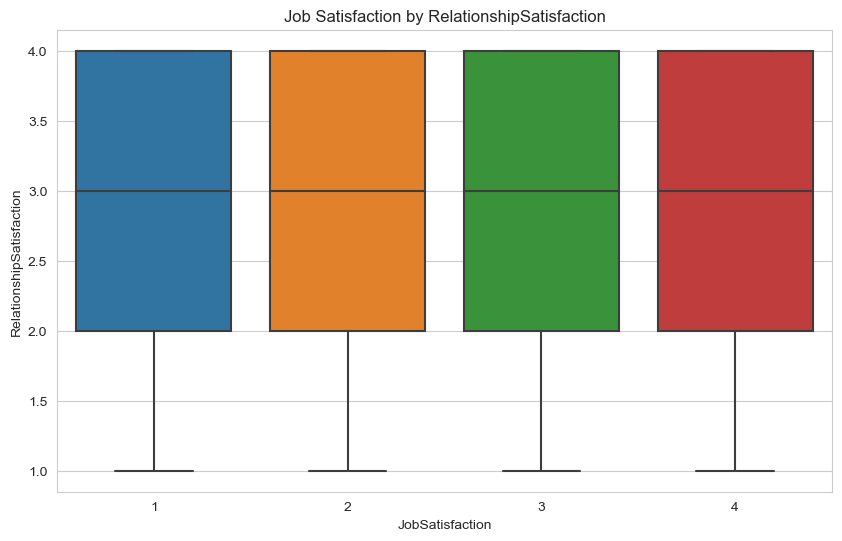

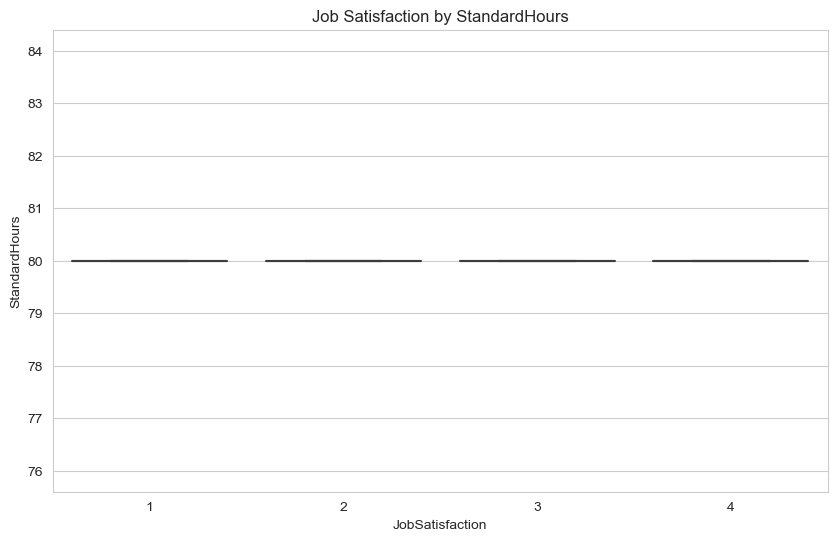

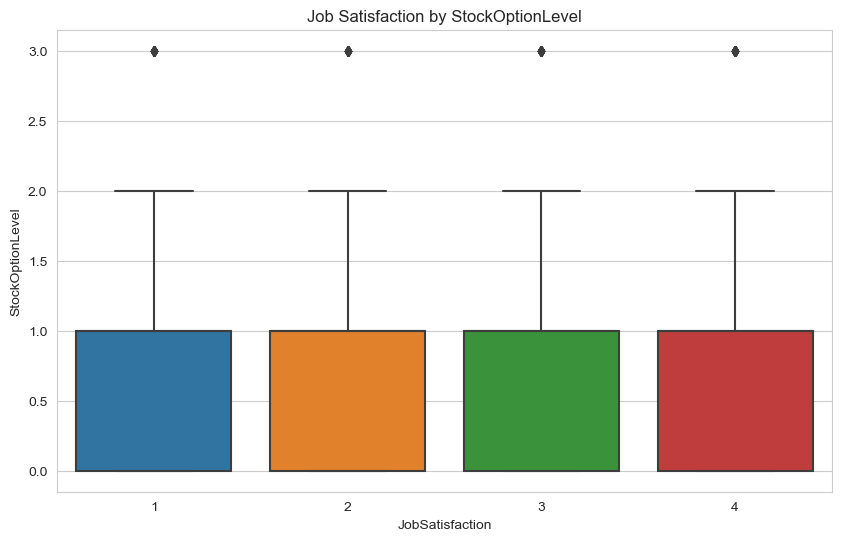

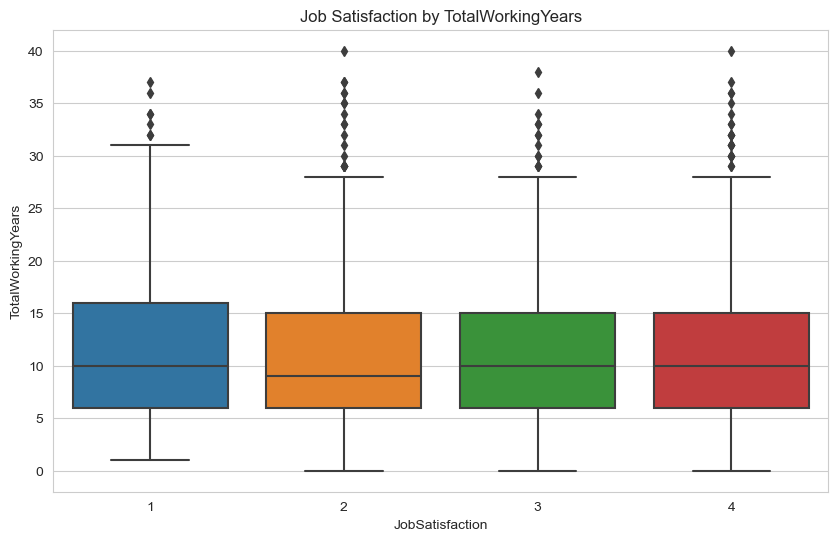

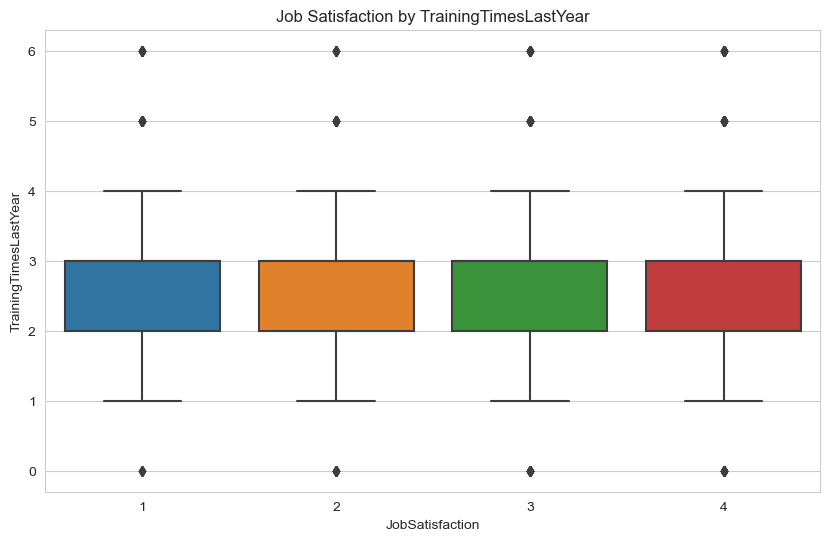

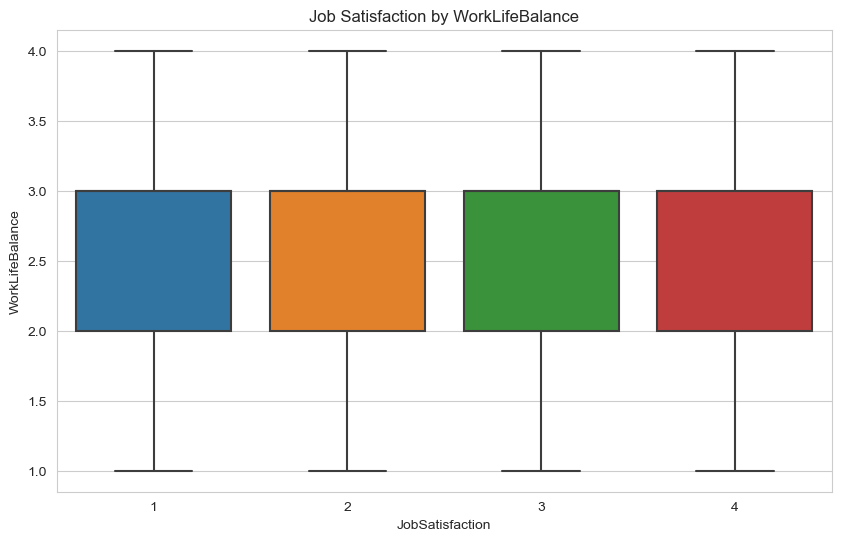

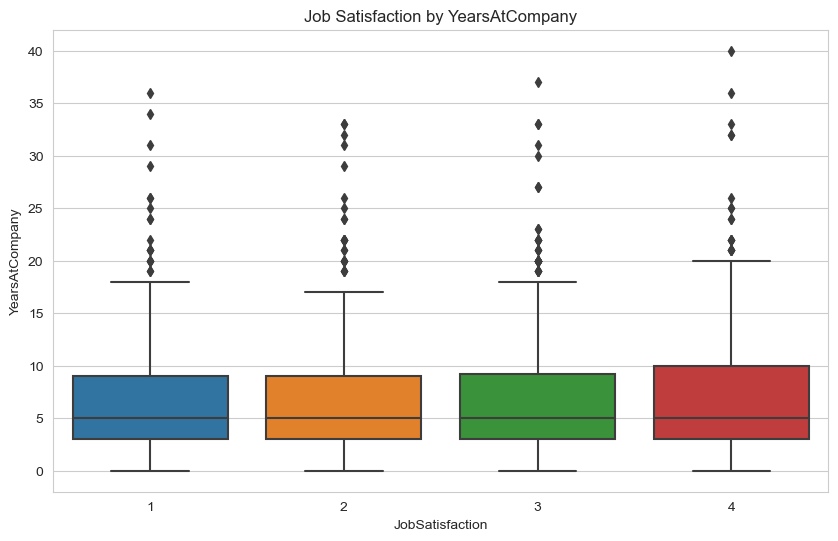

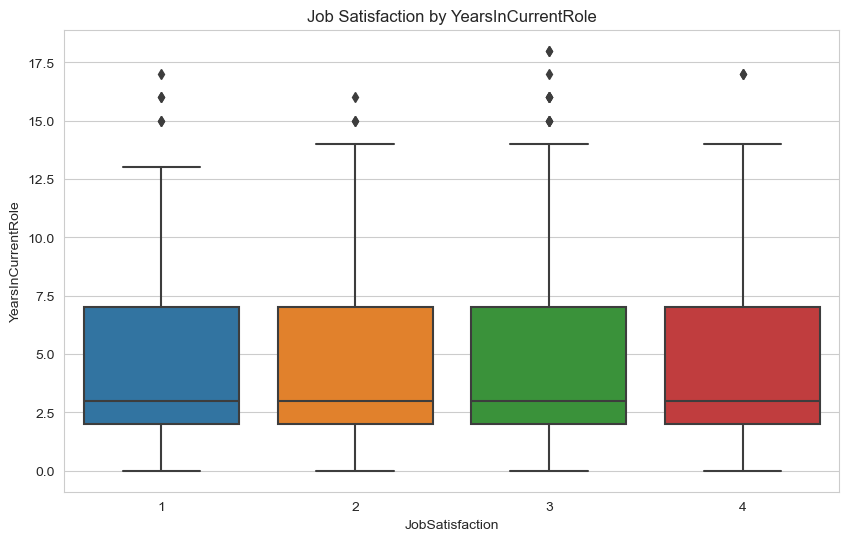

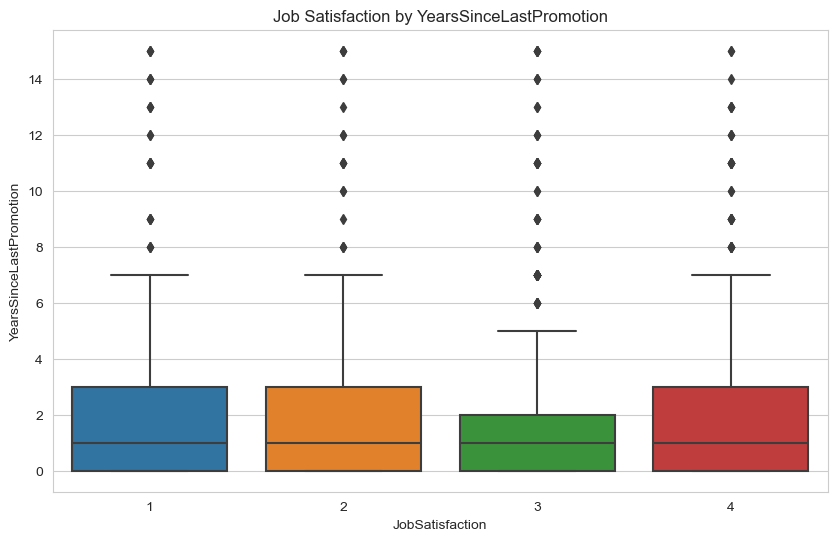

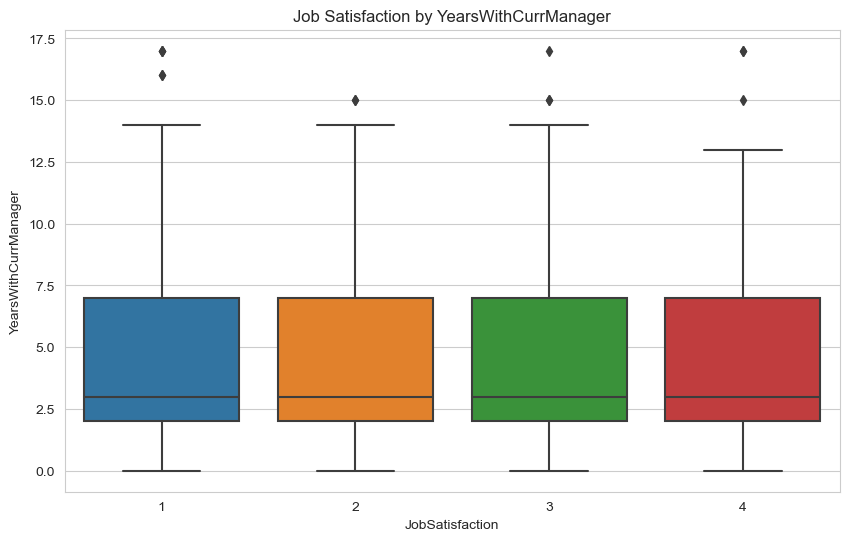

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of features to plot
features = hr_df.select_dtypes(include=[np.number]).columns.tolist()
features.remove('JobSatisfaction')

# Loop through the features and create boxplots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='JobSatisfaction', y=feature, data=hr_df)
    plt.title(f'Job Satisfaction by {feature}')
    plt.show()

### Exploring the Dynamics of Performance Ratings
Similarly, for Performance Ratings, the focus shifted to visual analysis due to the challenges faced in modeling. The visualizations, particularly the distribution of ratings across different job roles and departments, offered valuable insights. They helped in identifying roles where employees tend to have higher or lower performance ratings, thus shedding light on potential areas for improvement or further investigation. This approach was particularly useful in understanding the subtleties of performance dynamics within the company, offering a more descriptive and detailed perspective than what was gleaned from the modeling attempts.

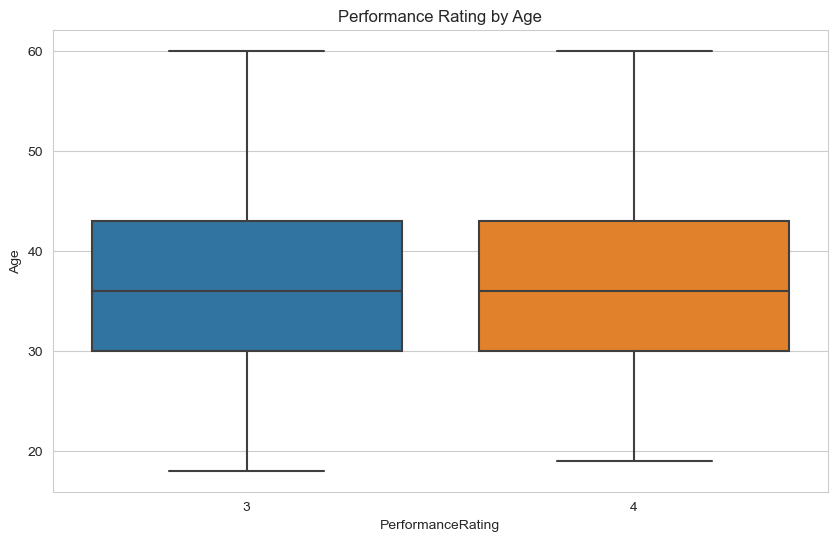

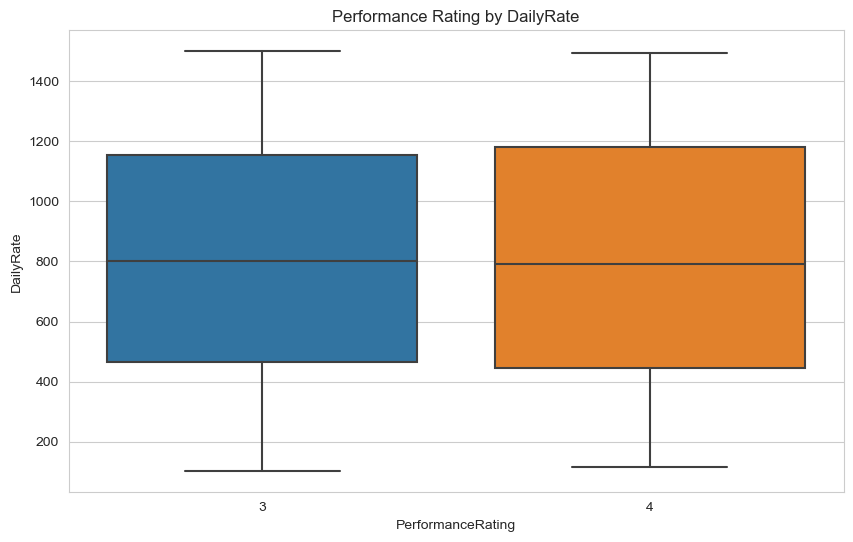

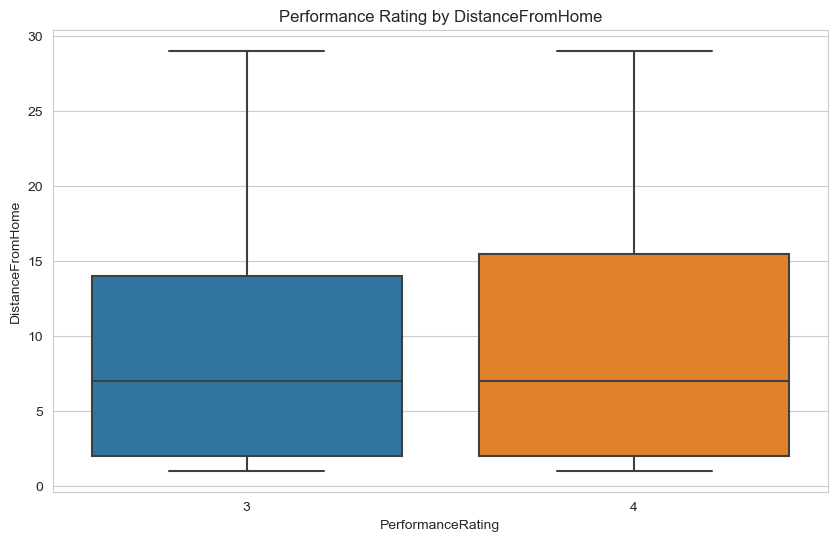

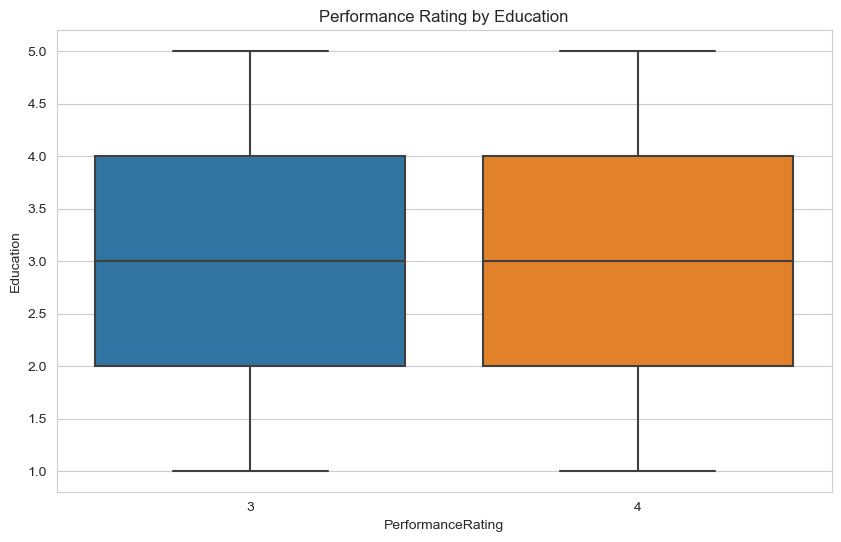

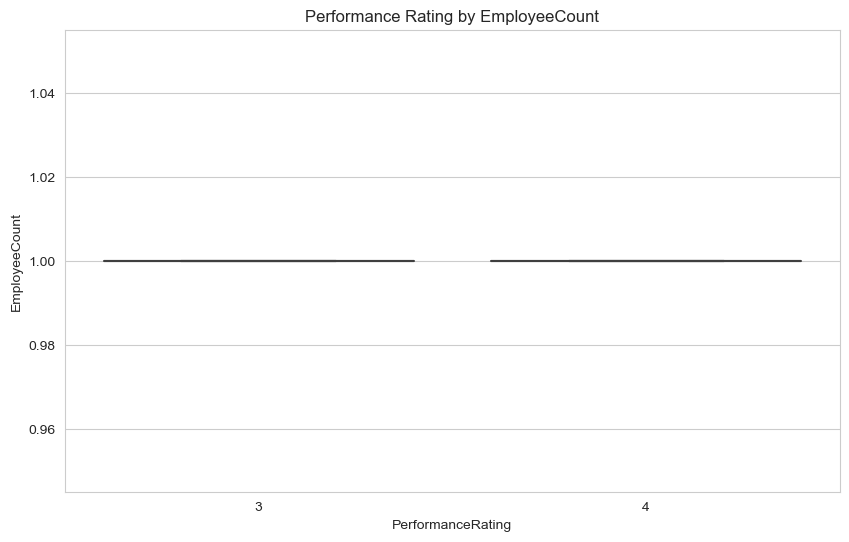

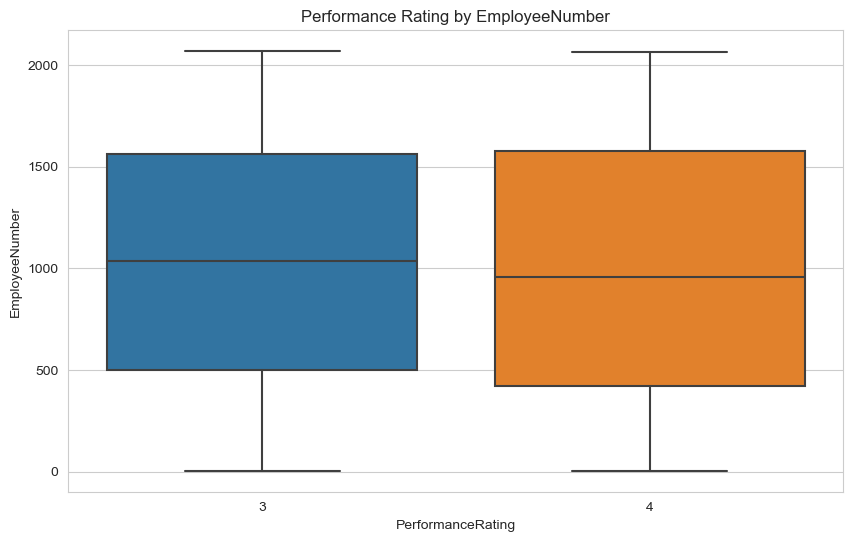

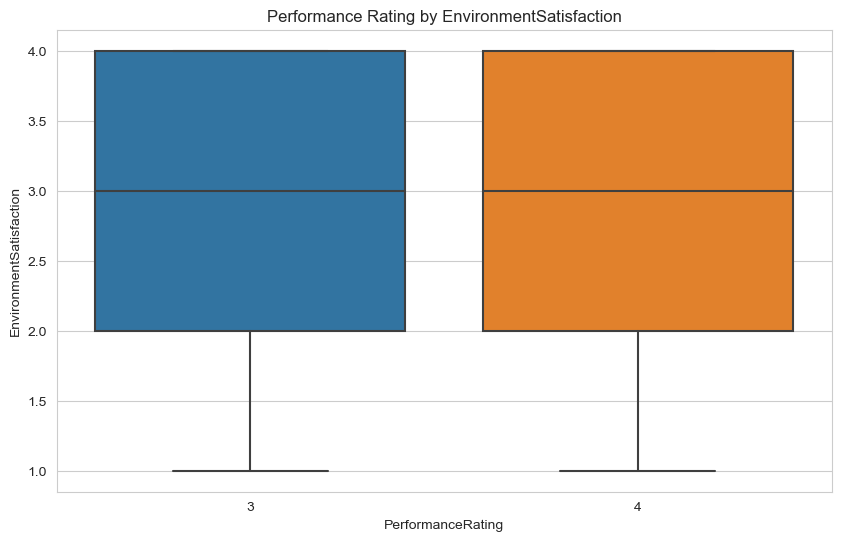

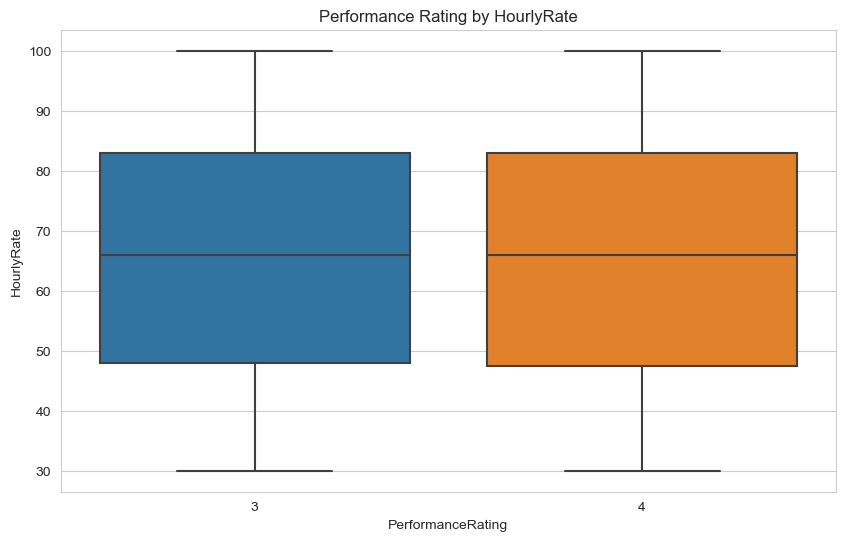

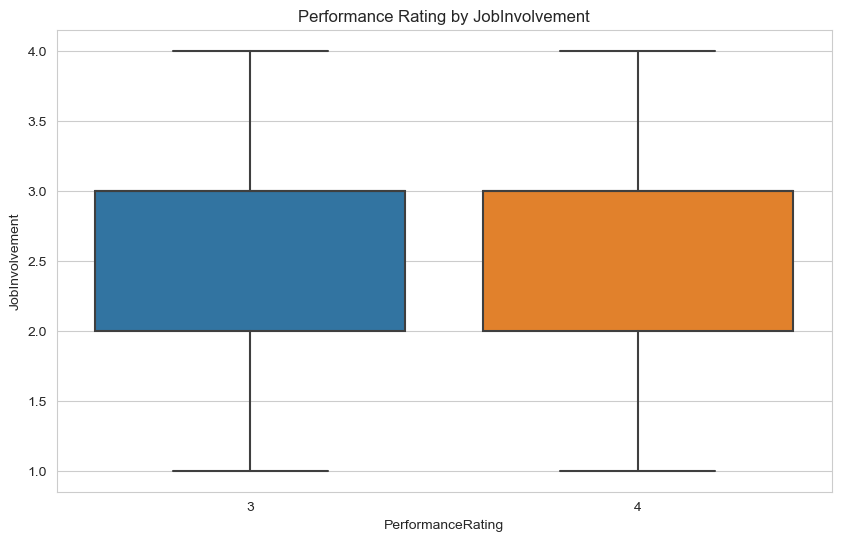

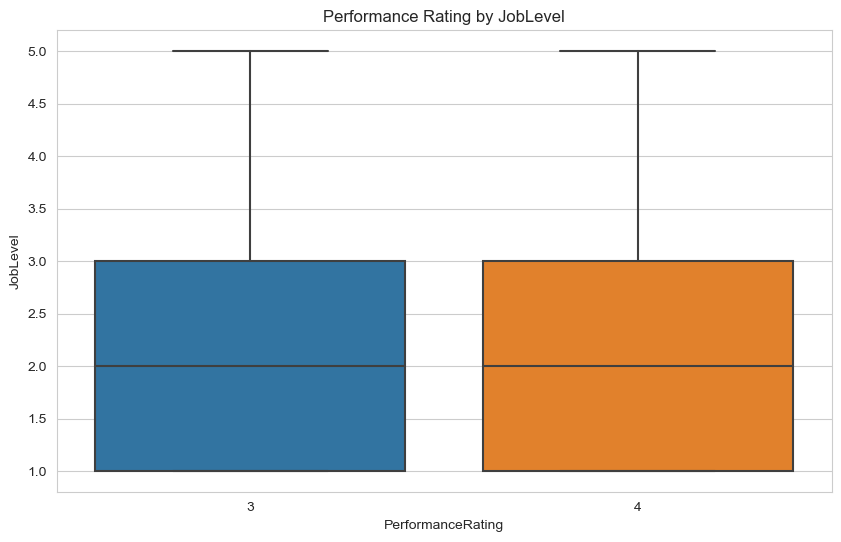

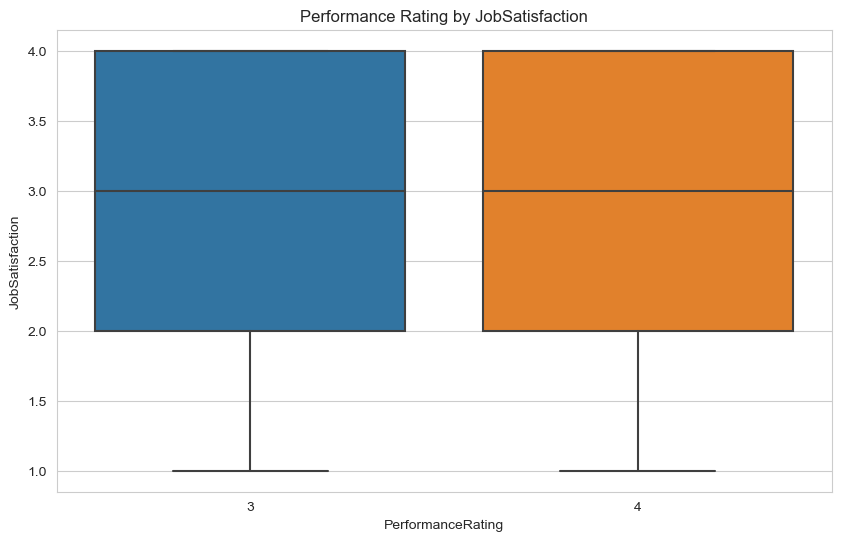

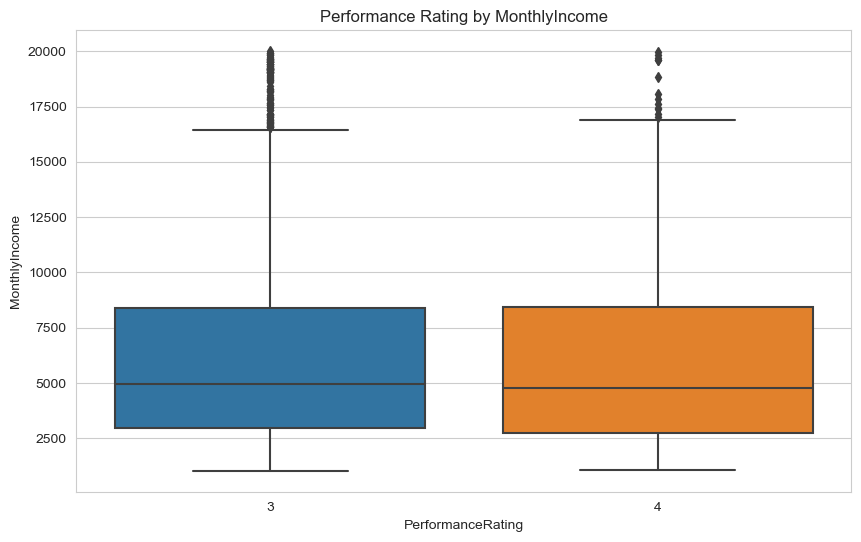

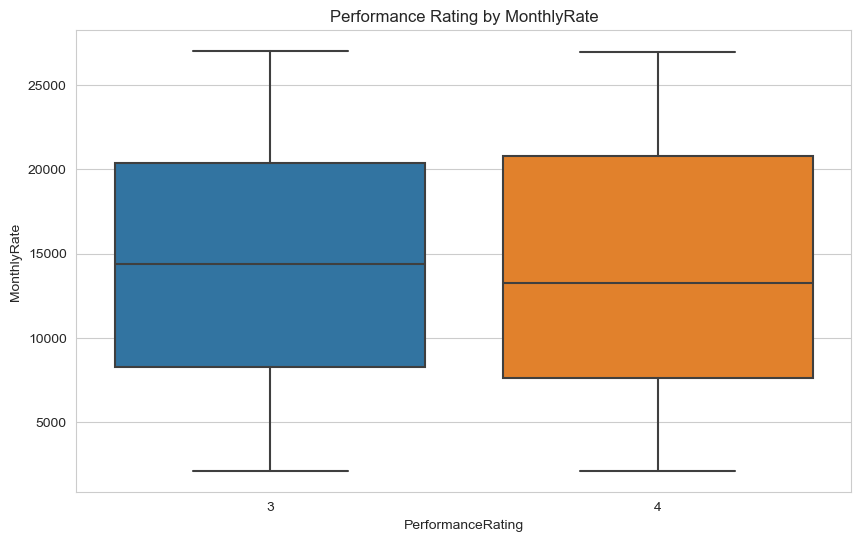

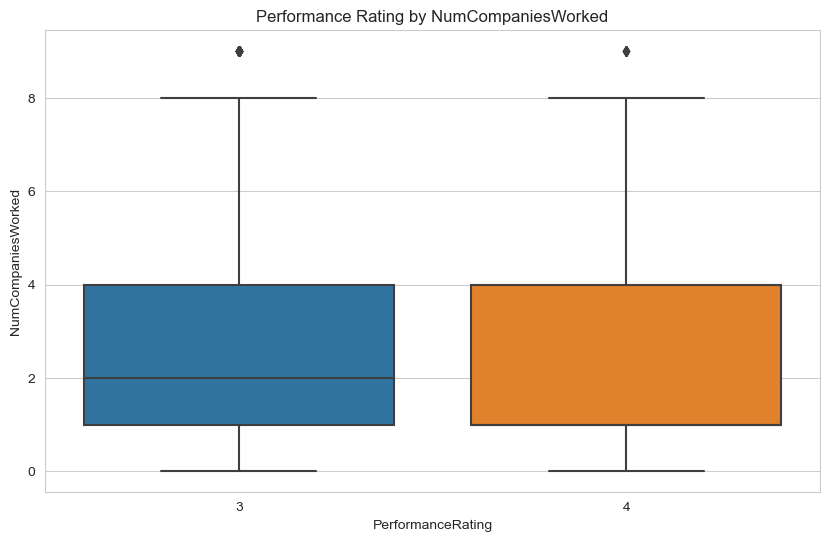

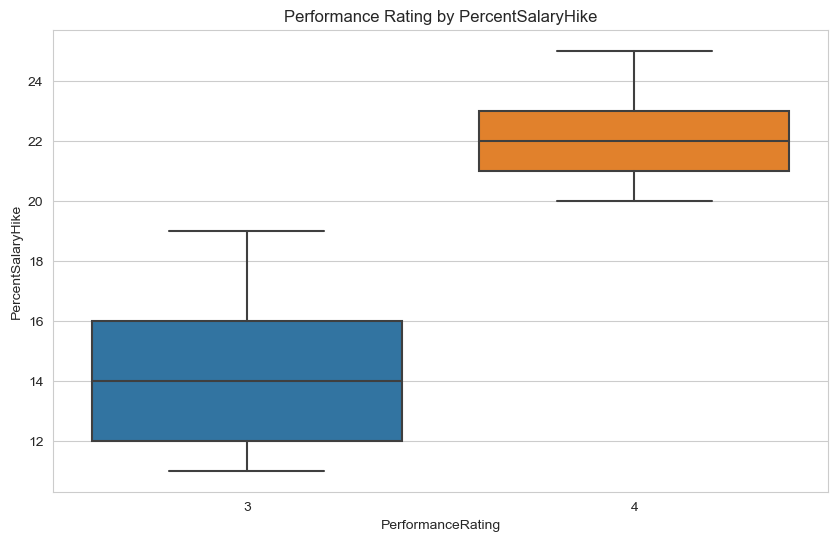

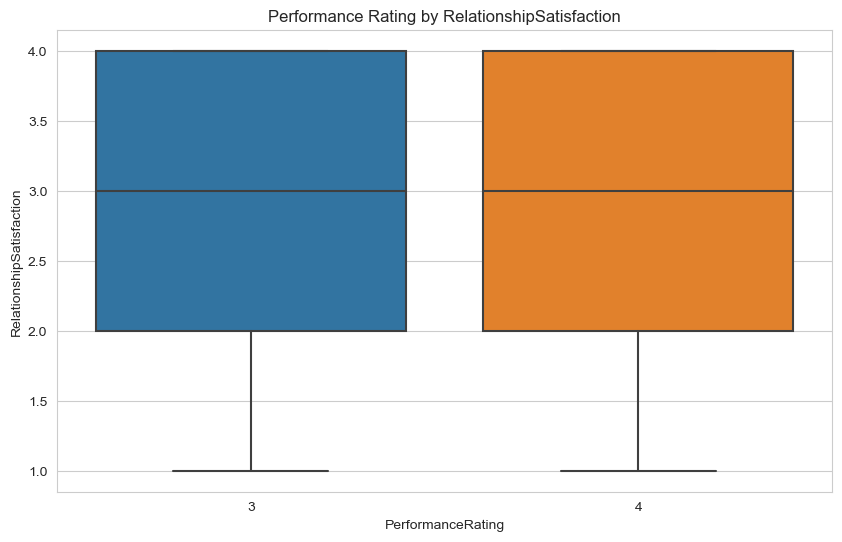

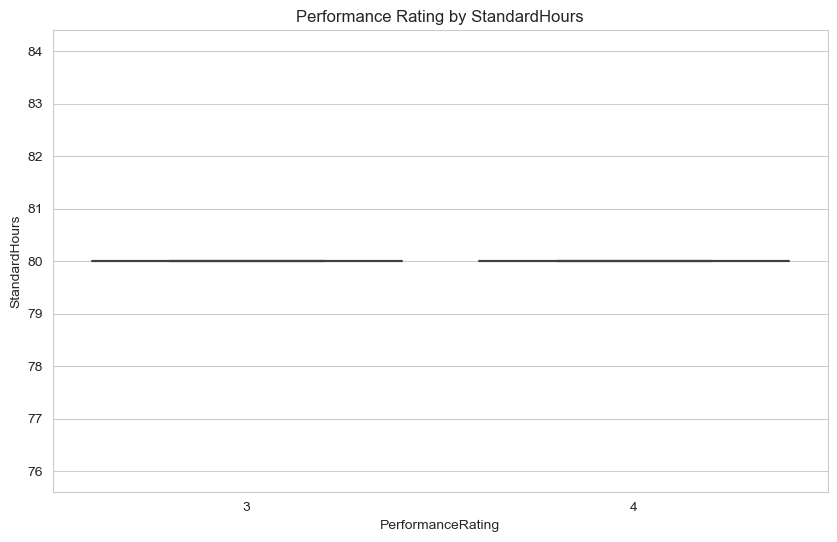

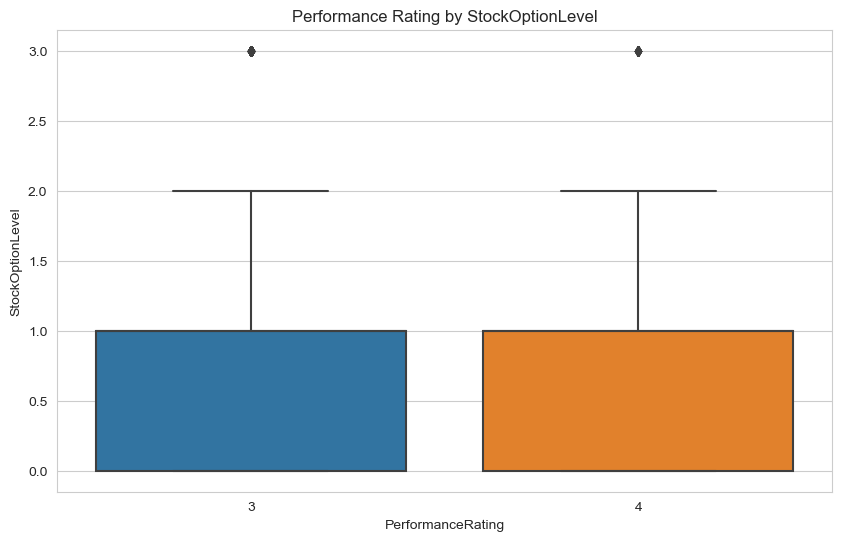

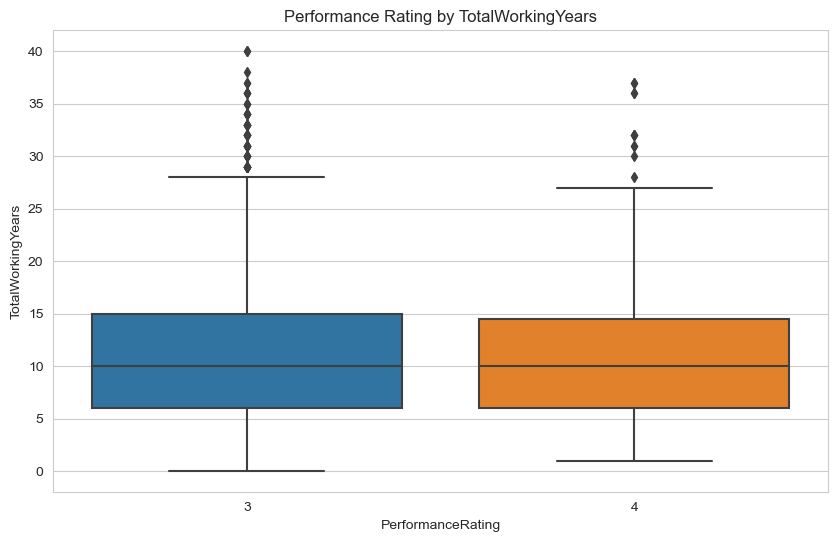

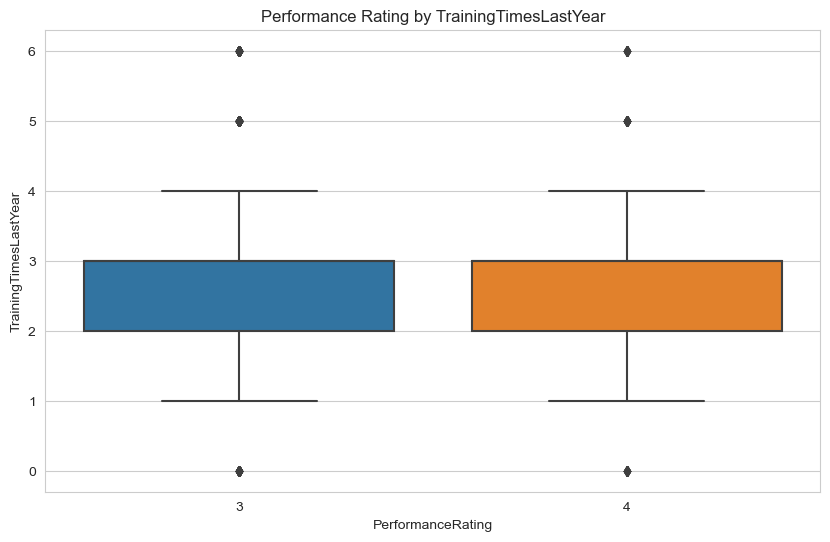

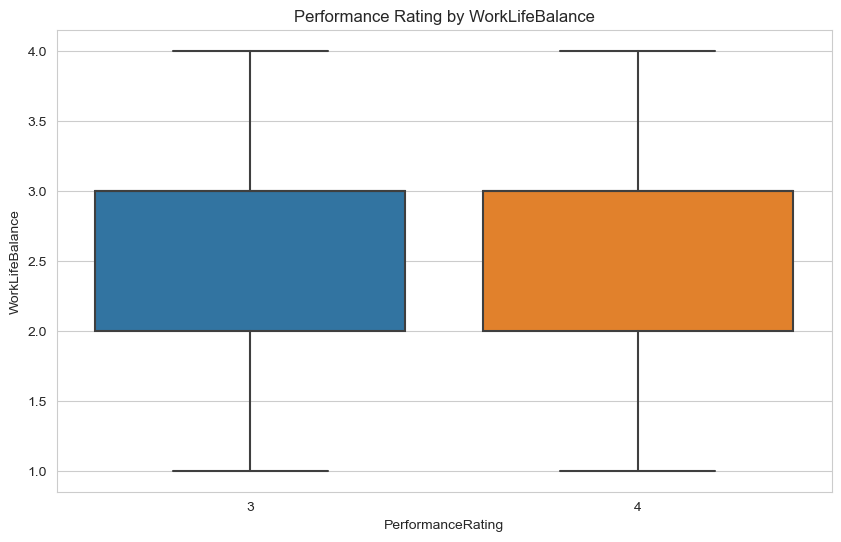

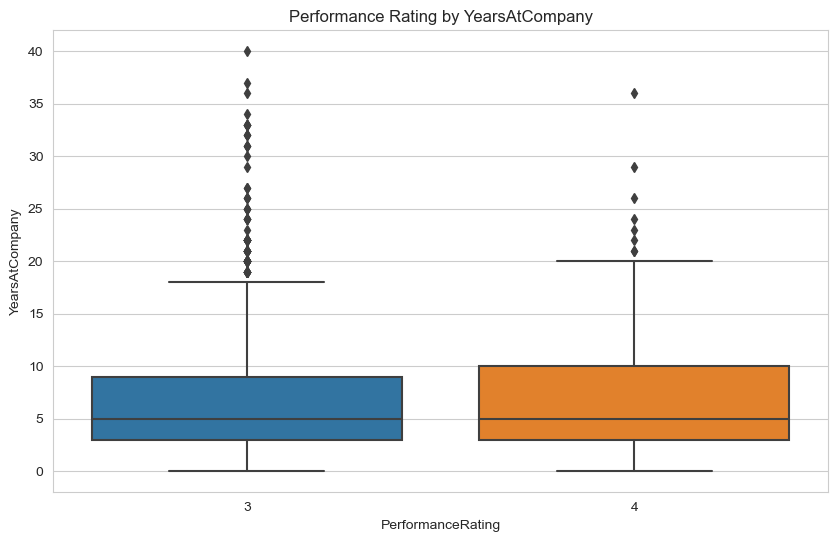

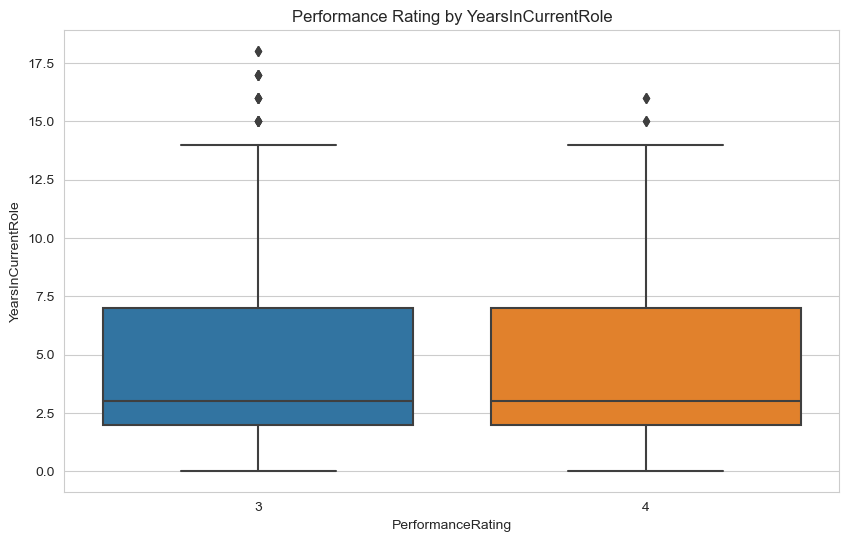

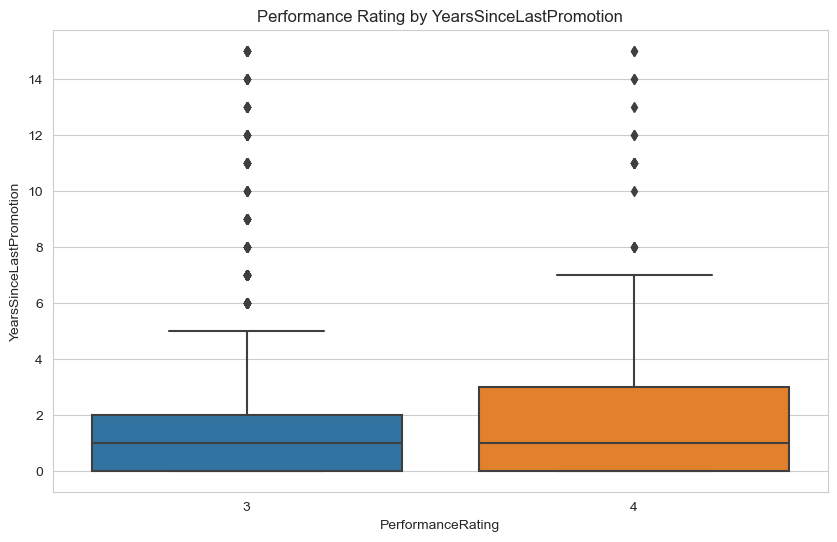

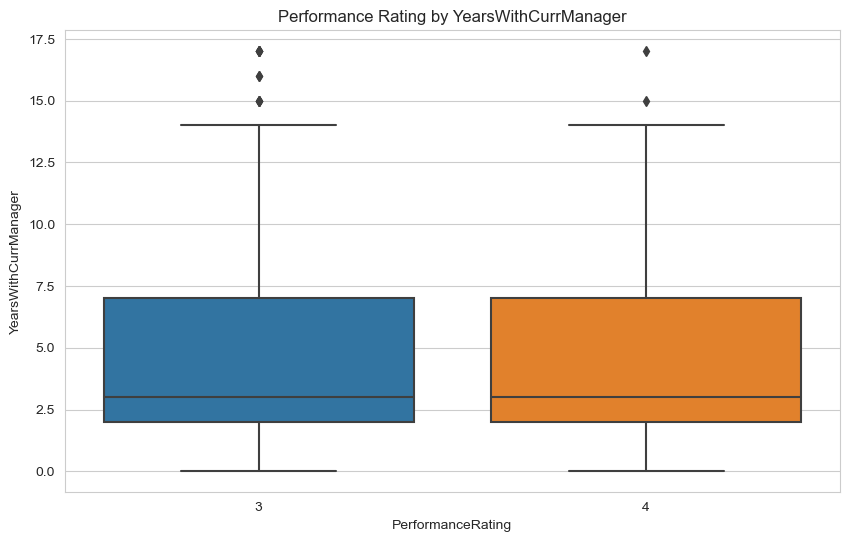

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of features to plot
features = hr_df.select_dtypes(include=[np.number]).columns.tolist()
features.remove('PerformanceRating')

# Loop through the features and create boxplots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='PerformanceRating', y=feature, data=hr_df)
    plt.title(f'Performance Rating by {feature}')
    plt.show()

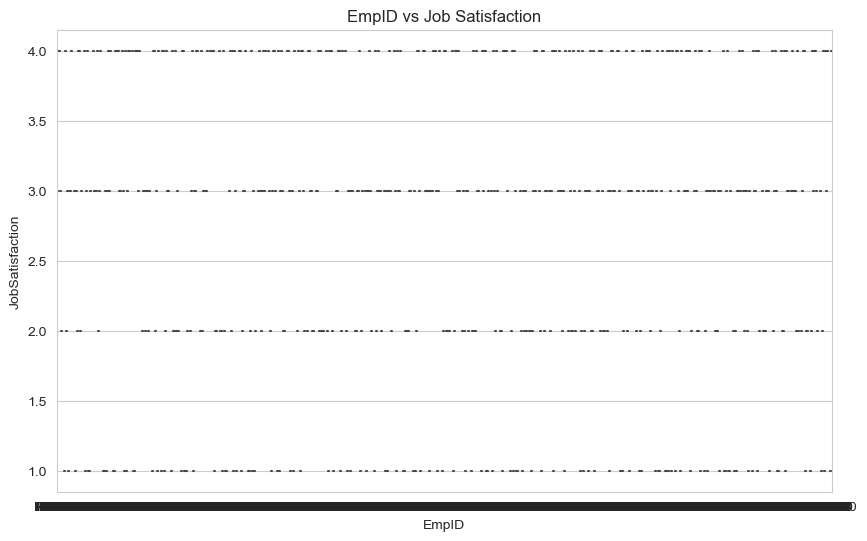

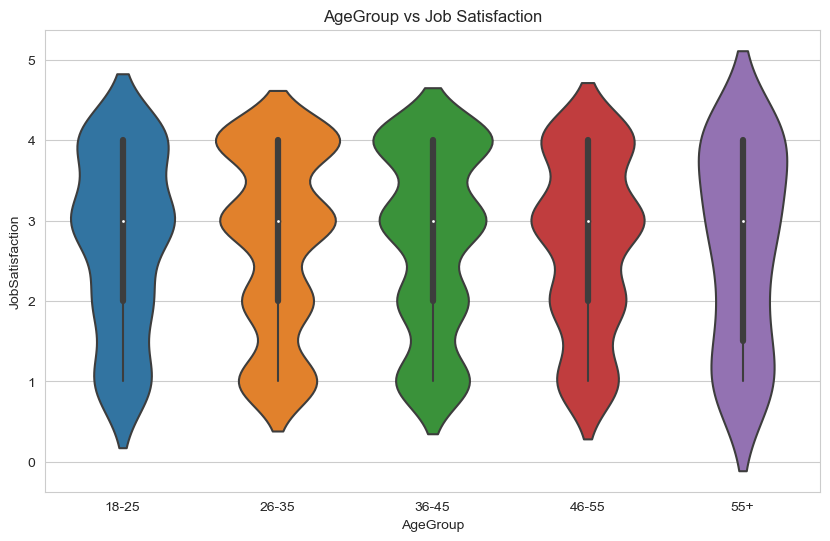

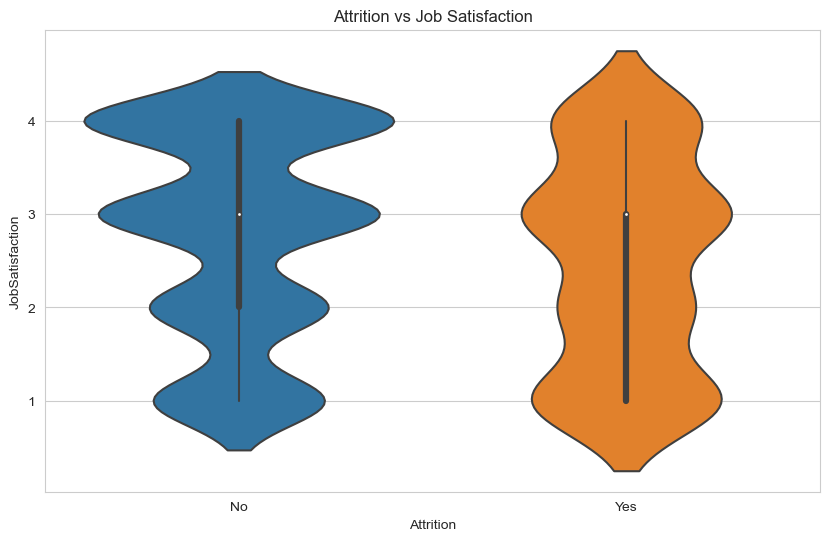

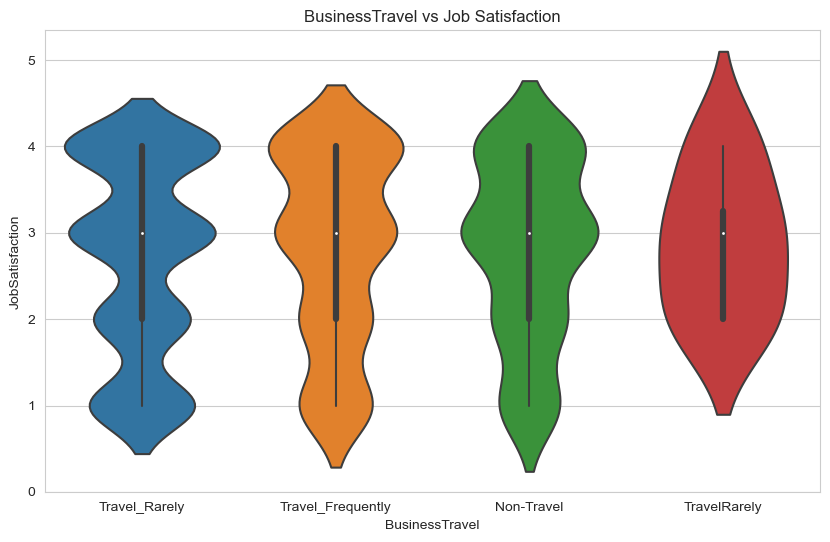

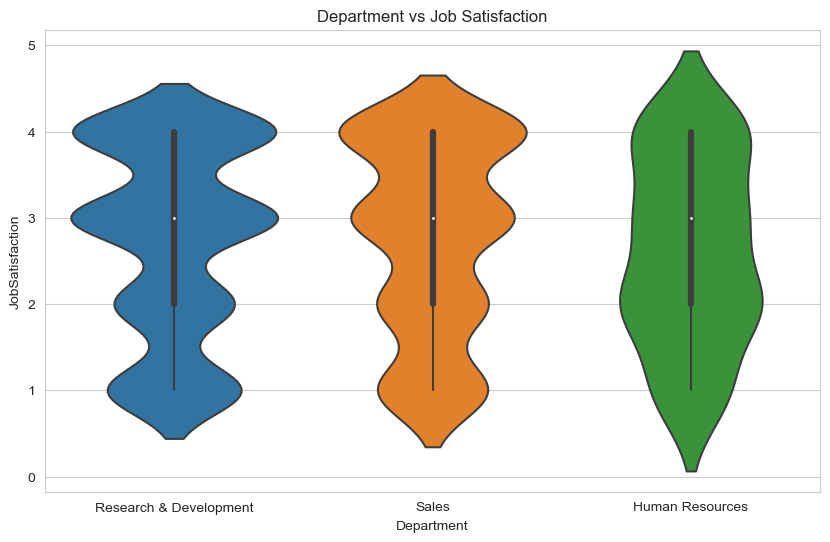

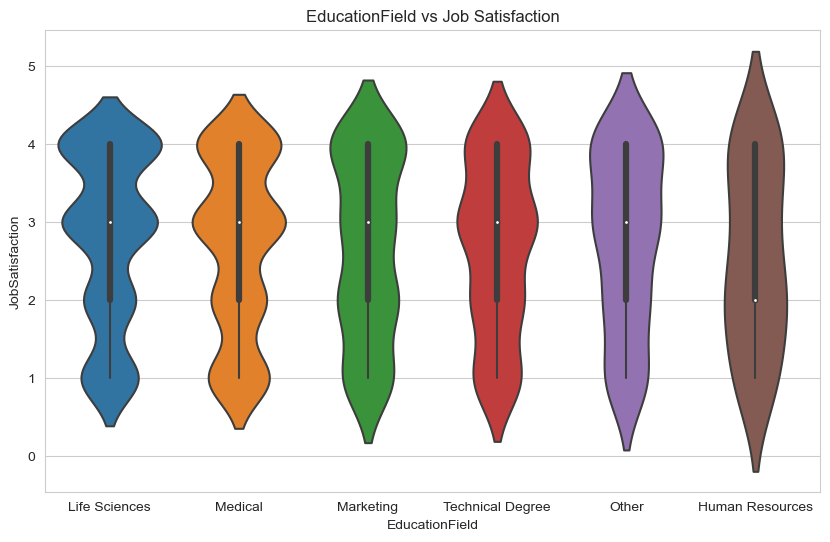

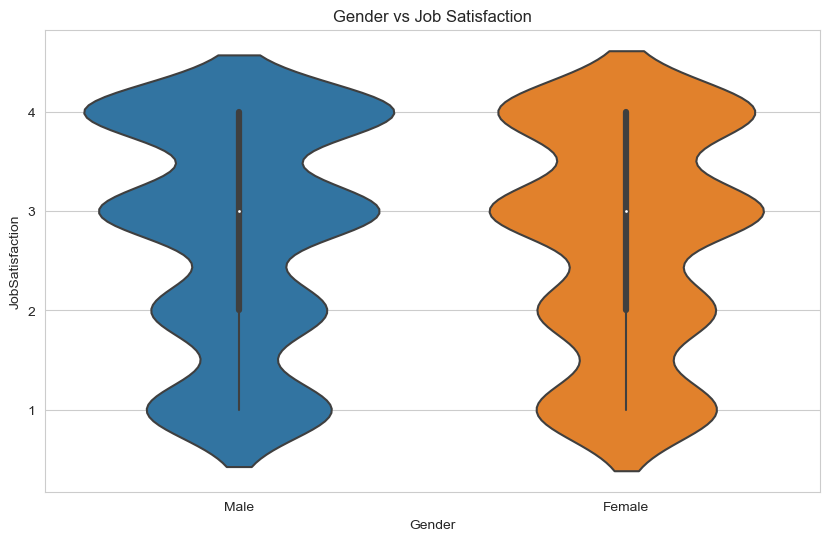

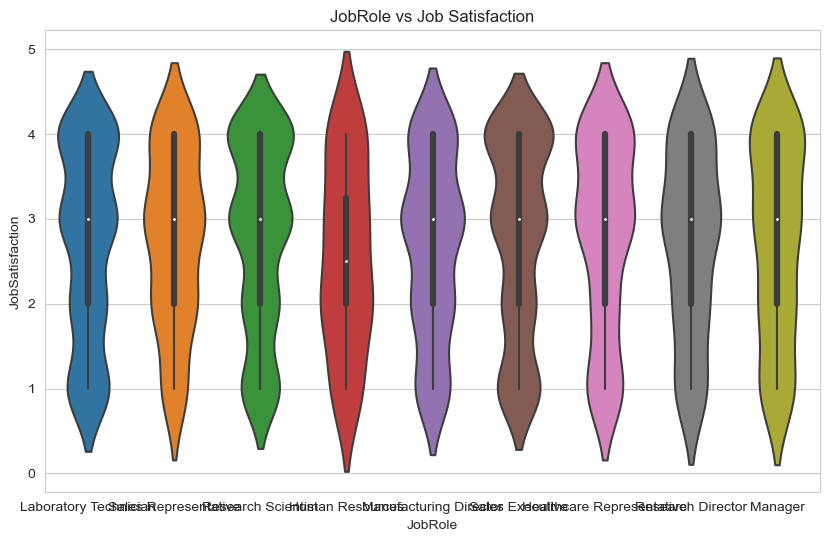

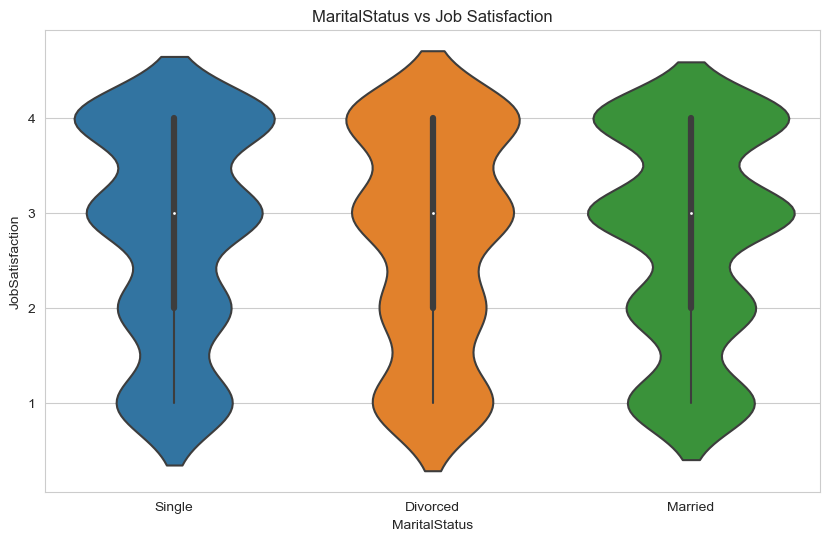

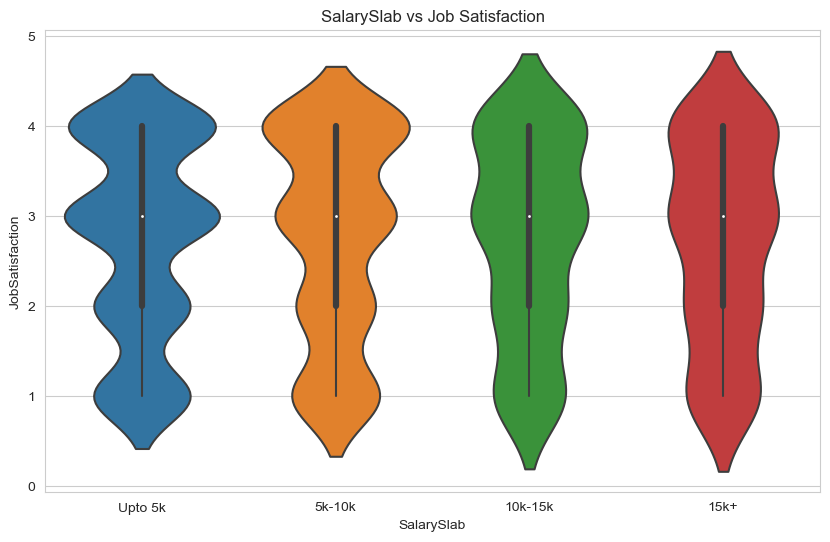

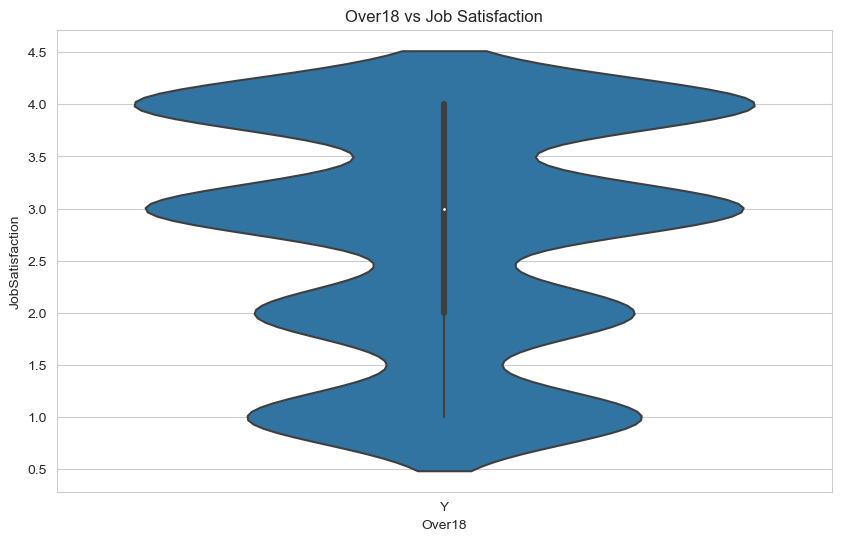

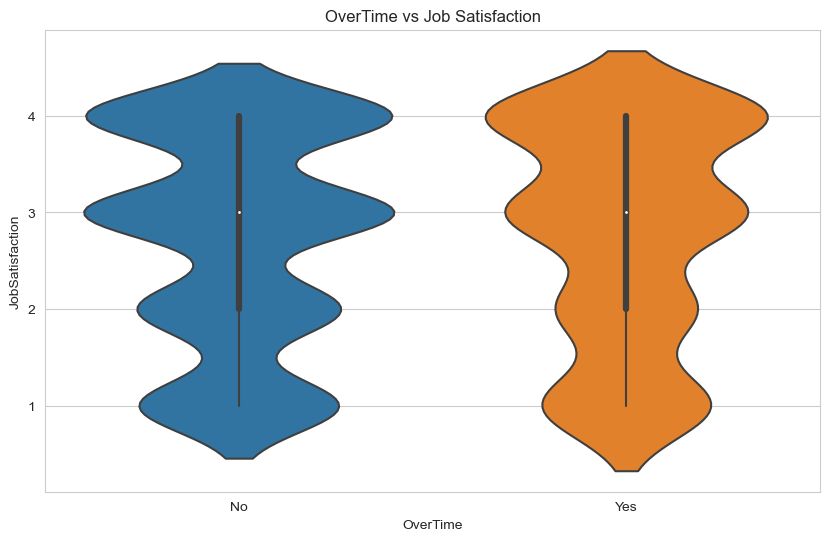

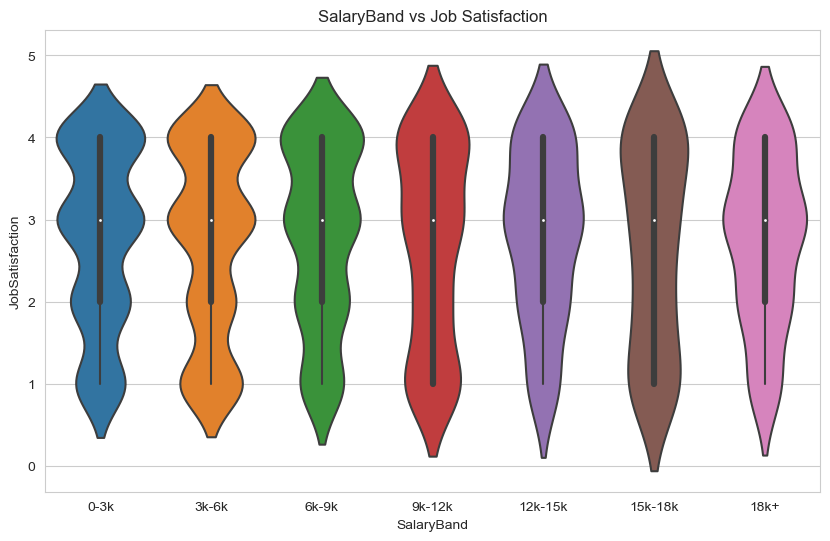

In [17]:
# Listing categorical features
categorical_features = hr_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Plotting violin plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=feature, y='JobSatisfaction', data=hr_df)
    plt.title(f'{feature} vs Job Satisfaction')
    plt.show()


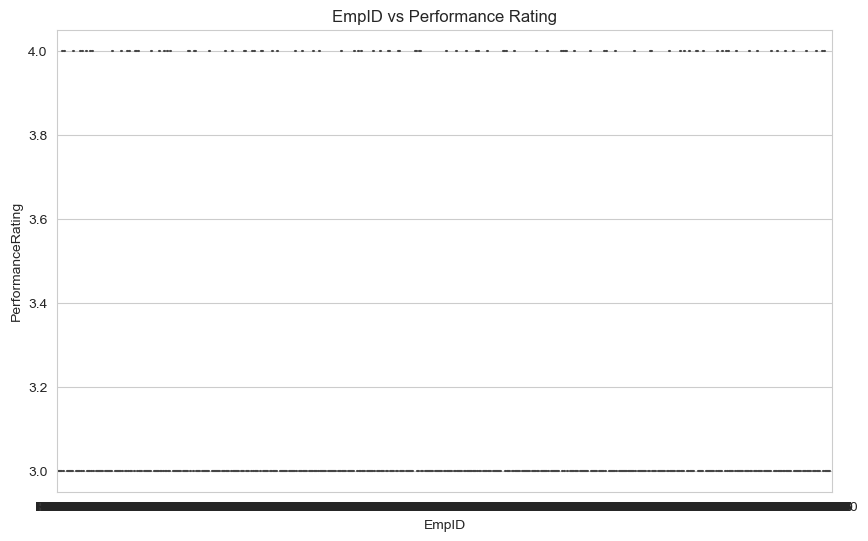

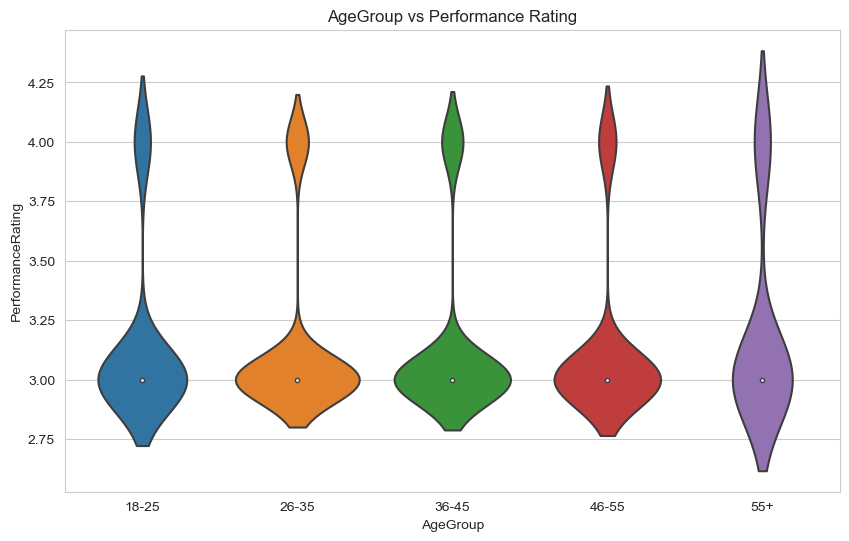

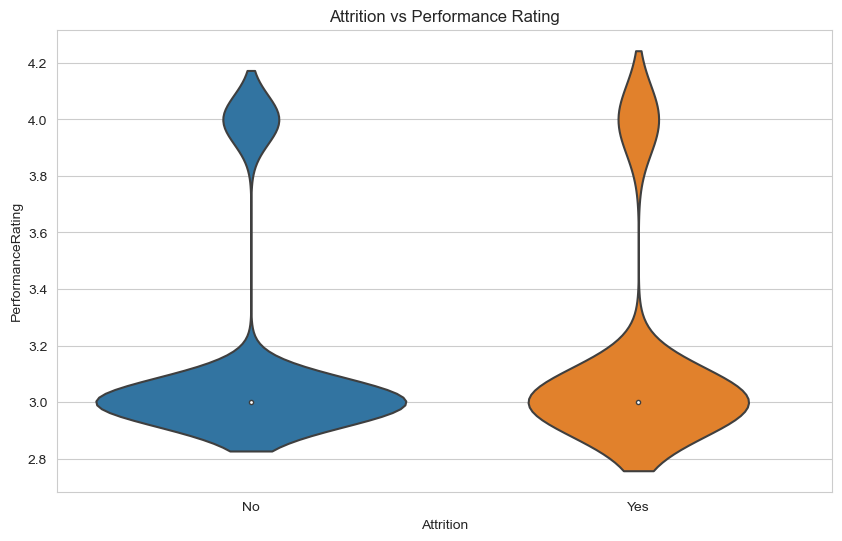

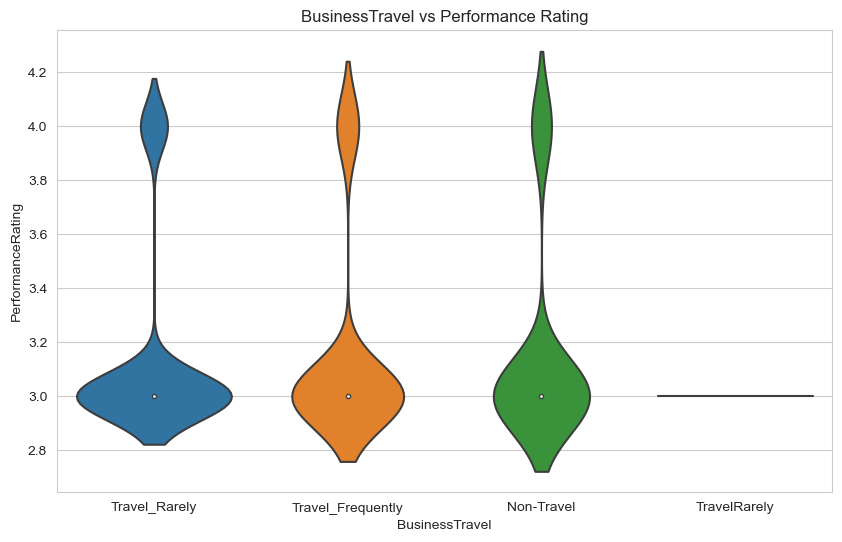

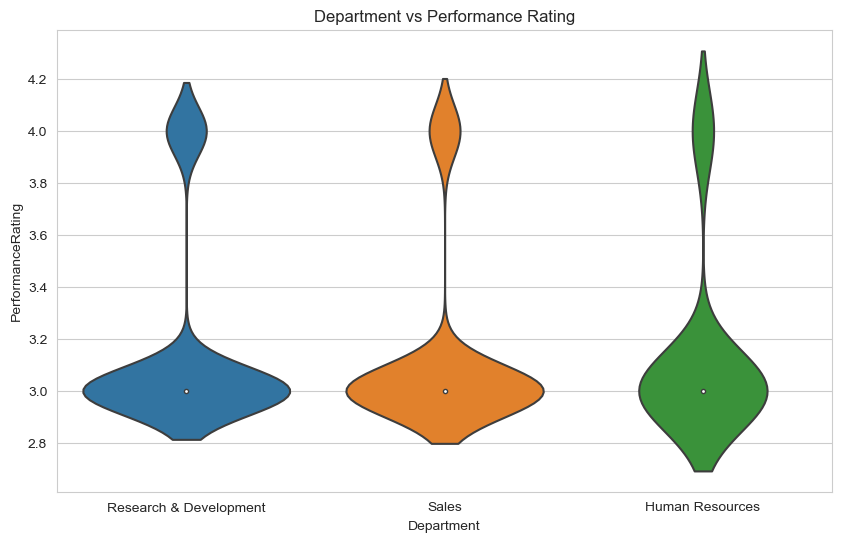

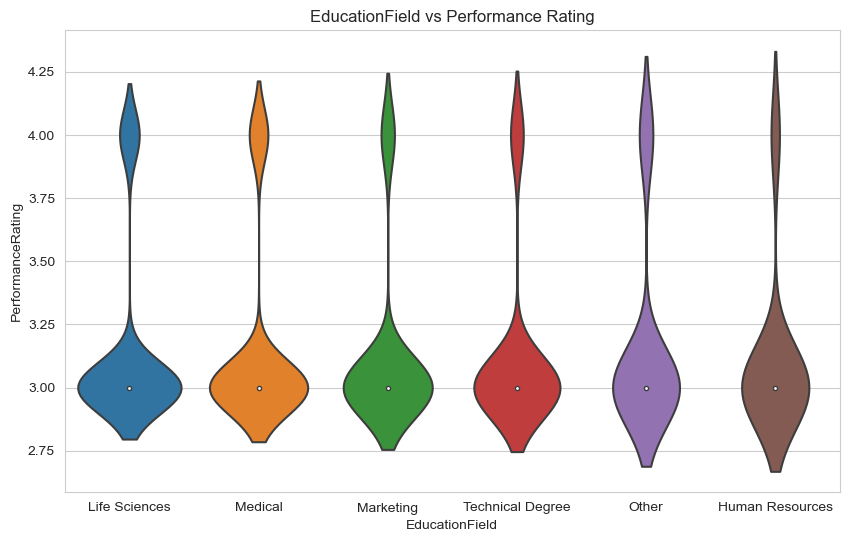

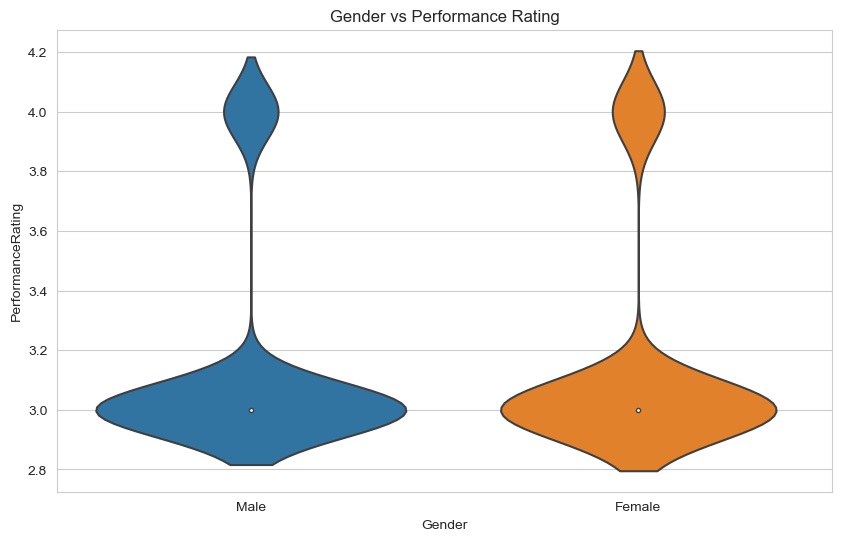

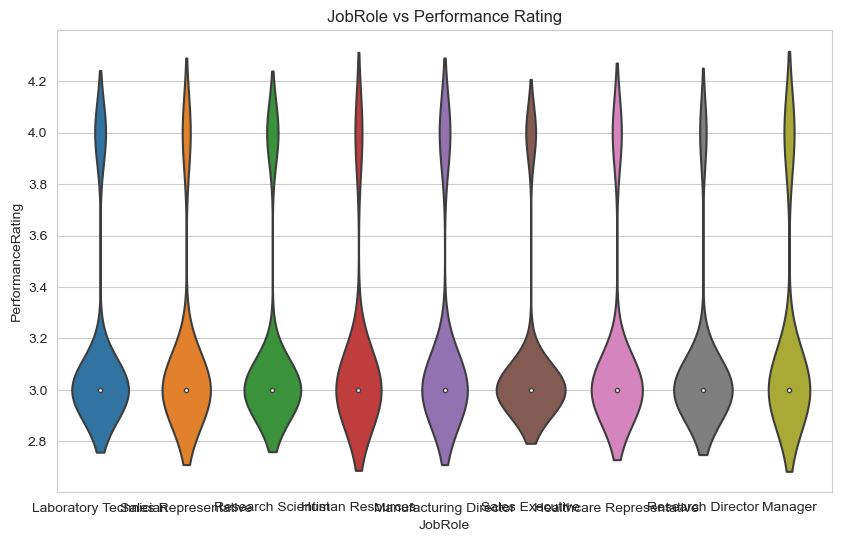

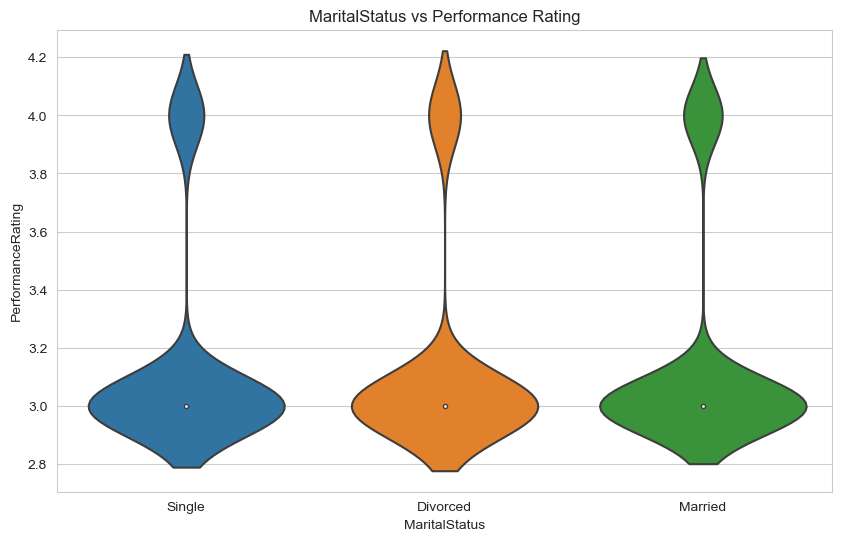

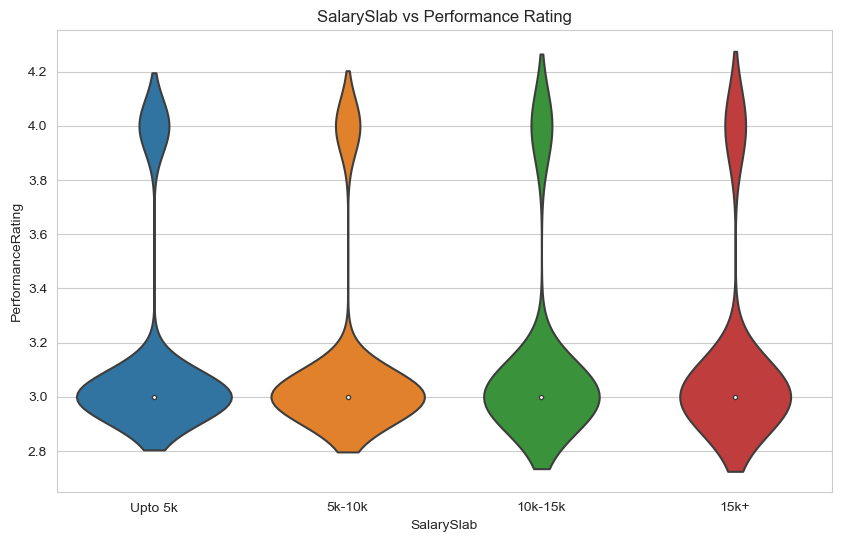

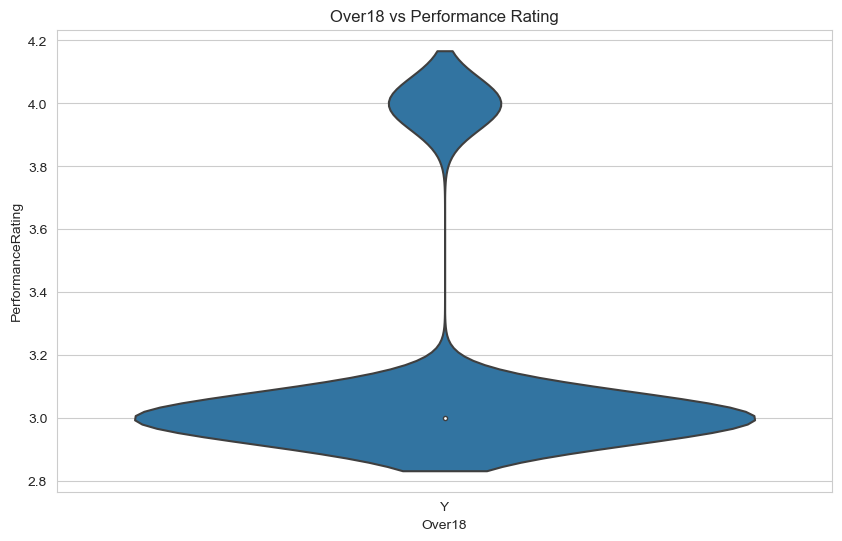

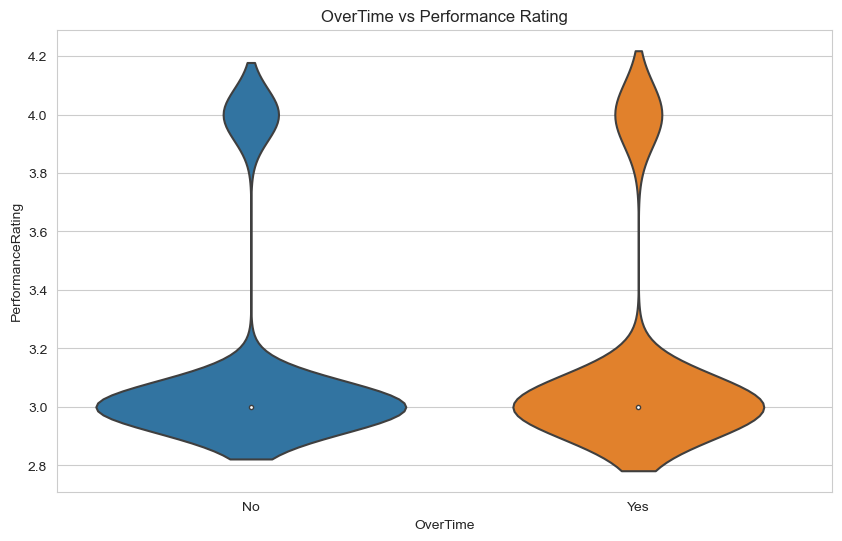

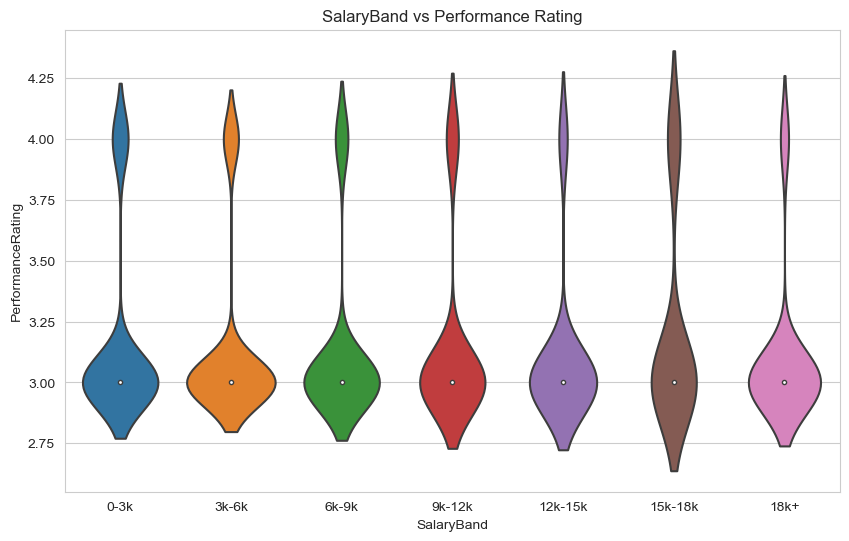

In [18]:
# Listing categorical features
categorical_features = hr_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Plotting violin plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=feature, y='PerformanceRating', data=hr_df)
    plt.title(f'{feature} vs Performance Rating')
    plt.show()
